In [108]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/vophuoctri/OneDrive/quaypha/data/')

In [109]:
df = pd.read_excel('shap_1021.xlsx')

In [110]:
df

Country Name   Expense   Medical   Old age  Educational  \
0               Albania -0.914193 -1.414569  0.040789     0.180077   
1               Algeria -2.564136 -1.496500  1.417552    -0.942446   
2             Argentina -0.542345 -0.480690  1.112739     1.475693   
3               Armenia -0.925730 -0.294069  0.480441    -1.127267   
4             Australia  5.573243  1.400403  1.512970     3.643444   
..                  ...       ...       ...       ...          ...   
105             Uruguay -1.274973 -1.383268  0.849179     1.854816   
106          Uzbekistan  2.952858  3.943437  3.904079     6.091831   
107  West Bank and Gaza -0.666769 -0.507162  2.231474    -0.266395   
108              Zambia -2.180906 -1.128584 -4.720788    -3.195313   
109            Zimbabwe -3.229345  0.247666 -3.315229    -2.171565   

     Expense, Low  Medical, Low  Old age, Low  Educational, Low  \
0        0.121136      2.595464     -1.708950          2.111057   
1       -2.515870      2.436099     -0.406492          1.608651   
2       -0.133001      0.972261     -0.062381          1.114695   
3       -0.536309      3.065818     -0.094558          1.174360   
4        5.586825     -2.815470      4.619489         -0.745508   
..            ...           ...           ...               ...   
105     -2.415673     -1.914826     -1.013756         -0.685428   
106      0.400746      1.605230      6.833536          3.253751   
107     -0.594598      3.130493     -0.012471          1.293420   
108     -1.747429     -0.162304     -9.772152         -2.898300   
109     -0.542431      2.884028     -3.223749         -1.132014   

     Expense, High  Medical, High  Old age, High  Educational, High  
0        -1.259853      -1.511137       0.363931           2.015135  
1        -1.533171      -2.162890       3.710259           1.911339  
2         0.647998       0.314840       1.030148           0.926730  
3         1.269458      -1.575788       1.205112           1.122450  
4         3.727665       8.569615       2.213713          -6.197156  
..             ...            ...            ...                ...  
105       1.055574       1.526362       0.908208          -0.268755  
106       5.864535       7.963047       7.332633           4.043553  
107      -0.635112      -1.263385       2.348323           1.206586  
108      -2.660604      -4.532960      -5.016204           1.299625  
109      -3.023160      -4.733516      -5.172005           2.288709  

[110 rows x 13 columns]

In [111]:
finance = pd.read_excel('finance_1003.xlsx')
finance

Country Name  \
0               Albania   
1               Algeria   
2             Argentina   
3               Armenia   
4             Australia   
..                  ...   
105             Uruguay   
106          Uzbekistan   
107  West Bank and Gaza   
108              Zambia   
109            Zimbabwe   

     Worried about not having enough money for monthly expenses or bills: worried (% age 15+)  \
0                                             0.732615                                          
1                                             0.671356                                          
2                                             0.746074                                          
3                                             0.659703                                          
4                                             0.298301                                          
..                                                 ...                                          
105                                           0.627031                                          
106                                           0.552944                                          
107                                           0.701671                                          
108                                           0.836889                                          
109                                           0.904139                                          

     Worried about not being able to pay for medical costs in case of a serious illness or accident: worried (% age 15+)  \
0                                             0.907634                                                                     
1                                             0.802301                                                                     
2                                             0.738494                                                                     
3                                             0.759388                                                                     
4                                             0.424180                                                                     
..                                                 ...                                                                     
105                                           0.679845                                                                     
106                                           0.566861                                                                     
107                                           0.809345                                                                     
108                                           0.918269                                                                     
109                                           0.916419                                                                     

     Worried about not having enough money for old age: worried (% age 15+)  \
0                                             0.800494                        
1                                             0.619312                        
2                                             0.724327                        
3                                             0.604209                        
4                                             0.537404                        
..                                                 ...                        
105                                           0.697367                        
106                                           0.450190                        
107                                           0.683449                        
108                                           0.907924                        
109                                           0.899632                        

     Worried about not being able to pay school fees or fees for education: worried

In [112]:
df.columns = finance.columns

In [113]:
finance.sort_values('Worried about not having enough money for monthly expenses or bills: worried (% age 15+)').tail(5)['Country Name'].tolist()

['Pakistan', 'Mali', 'Zimbabwe', 'Georgia', 'Malawi']

In [114]:
finance.describe().T

count      mean       std  \
Worried about not having enough money for month...  110.0  0.645683  0.188634   
Worried about not being able to pay for medical...  110.0  0.747078  0.165301   
Worried about not having enough money for old a...  110.0  0.715494  0.131070   
Worried about not being able to pay school fees...  110.0  0.614591  0.183584   
Worried about not having enough money for month...  110.0  0.726683  0.180501   
Worried about not being able to pay for medical...  110.0  0.795665  0.158222   
Worried about not having enough money for old a...  110.0  0.765611  0.125696   
Worried about not being able to pay school fees...  110.0  0.683569  0.173681   
Worried about not having enough money for month...  110.0  0.591858  0.201356   
Worried about not being able to pay for medical...  110.0  0.714787  0.174098   
Worried about not having enough money for old a...  110.0  0.682189  0.140691   
Worried about not being able to pay school fees...  110.0  0.568764  0.195142   

                                                         min       25%  \
Worried about not having enough money for month...  0.226624  0.496825   
Worried about not being able to pay for medical...  0.288780  0.667231   
Worried about not having enough money for old a...  0.414215  0.619650   
Worried about not being able to pay school fees...  0.235182  0.493588   
Worried about not having enough money for month...  0.221496  0.627465   
Worried about not being able to pay for medical...  0.271478  0.734395   
Worried about not having enough money for old a...  0.424975  0.685485   
Worried about not being able to pay school fees...  0.292145  0.557434   
Worried about not having enough money for month...  0.160563  0.426660   
Worried about not being able to pay for medical...  0.207020  0.608914   
Worried about not having enough money for old a...  0.359506  0.588802   
Worried about not being able to pay school fees...  0.171646  0.425894   

                                                         50%       75%  \
Worried about not having enough money for month...  0.697700  0.791915   
Worried about not being able to pay for medical...  0.799690  0.870733   
Worried about not having enough money for old a...  0.748224  0.817224   
Worried about not being able to pay school fees...  0.649480  0.756117   
Worried about not having enough money for month...  0.779103  0.855219   
Worried about not being able to pay for medical...  0.850230  0.910544   
Worried about not having enough money for old a...  0.793152  0.858814   
Worried about not being able to pay school fees...  0.713131  0.826822   
Worried about not having enough money for month...  0.648688  0.754568   
Worried about not being able to pay for medical...  0.761107  0.849196   
Worried about not having enough money for old a...  0.717425  0.785940   
Worried about not being able to pay school fees...  0.606694  0.706827   

                                                         max  
Worried about not having enough money for month...  0.969764  
Worried about not being able to pay for medical...  0.979953  
Worried about not having enough money for old a...  0.959106  
Worried about not being able to pay school fees...  0.973708  
Worried about not having enough money for month...  0.988606  
Worried about not being able to pay for medical...  0.994767  
Worried about not having enough money for old a...  0.982768  
Worried about not being able to pay school fees...  0.990188  
Worried about not having enough money for month...  0.957204  
Worried about not being able to pay for medical...  0.970078  
Worried about not having enough money for old a...  0.943333  
Worried about not being able to pay school fees...  0.962722

In [115]:
columns = {
            'Worried about not having enough money for monthly expenses or bills: worried (% age 15+)':'Worries for monthly expenses',
            'Worried about not having enough money for monthly expenses or bills: worried, income, richest 60% (% age 15+)':'Worries for monthly expenses - High income group',
            'Worried about not having enough money for monthly expenses or bills: worried, income, poorest 40% (% age 15+)':'Worries for monthly expenses - Low income group',
            'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried (% age 15+)':'Worries for medical costs',
            'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, richest 60% (% age 15+)':'Worries for medical costs - High income group',
            'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, poorest 40% (% age 15+)':'Worries for medical costs - Low income group',
            'Worried about not having enough money for old age: worried (% age 15+)':'Worries for old age',
            'Worried about not having enough money for old age: worried, income, richest 60% (% age 15+)':'Worries for old age - High income group',
            'Worried about not having enough money for old age: worried, income, poorest 40% (% age 15+)':'Worries for old age - Low income group',
            'Worried about not being able to pay school fees or fees for education: worried (% age 15+)':'Worries for educational fees',
            'Worried about not being able to pay school fees or fees for education: worried, income, richest 60% (% age 15+)':'Worries for educational fees - High income group',
            'Worried about not being able to pay school fees or fees for education: worried, income, poorest 40% (% age 15+)':'Worries for educational fees - Low income group'
        }

In [116]:
df_sub = df.rename(columns=columns).set_index('Country Name')
finance_sub = finance.rename(columns=columns).set_index('Country Name')
df_sub

Worries for monthly expenses  Worries for medical costs  \
Country Name                                                                  
Albania                                -0.914193                  -1.414569   
Algeria                                -2.564136                  -1.496500   
Argentina                              -0.542345                  -0.480690   
Armenia                                -0.925730                  -0.294069   
Australia                               5.573243                   1.400403   
...                                          ...                        ...   
Uruguay                                -1.274973                  -1.383268   
Uzbekistan                              2.952858                   3.943437   
West Bank and Gaza                     -0.666769                  -0.507162   
Zambia                                 -2.180906                  -1.128584   
Zimbabwe                               -3.229345                   0.247666   

                    Worries for old age  Worries for educational fees  \
Country Name                                                            
Albania                        0.040789                      0.180077   
Algeria                        1.417552                     -0.942446   
Argentina                      1.112739                      1.475693   
Armenia                        0.480441                     -1.127267   
Australia                      1.512970                      3.643444   
...                                 ...                           ...   
Uruguay                        0.849179                      1.854816   
Uzbekistan                     3.904079                      6.091831   
West Bank and Gaza             2.231474                     -0.266395   
Zambia                        -4.720788                     -3.195313   
Zimbabwe                      -3.315229                     -2.171565   

                    Worries for monthly expenses - Low income group  \
Country Name                                                          
Albania                                                    0.121136   
Algeria                                                   -2.515870   
Argentina                                                 -0.133001   
Armenia                                                   -0.536309   
Australia                                                  5.586825   
...                                                             ...   
Uruguay                                                   -2.415673   
Uzbekistan                                                 0.400746   
West Bank and Gaza                                        -0.594598   
Zambia                                                    -1.747429   
Zimbabwe                                                  -0.542431   

                    Worries for medical costs - Low income group  \
Country Name                                                       
Albania                                                 2.595464   
Algeria                                                 2.436099   
Argentina                                               0.972261   
Armenia                                                 3.065818   
Australia                                              -2.815470   
...                                                          ...   
Uruguay                                                -1.914826   
Uzbekistan                                              1.605230   
West Bank and Gaza                                      3.130493   
Zambia                                                 -0.162304   
Zimbabwe                                                2.884028   

                    Worries for old age - Low income group  \
Country Name                                                 
Albania                                          -1.708950   
Algeria                                        

In [117]:
finance_sub.describe().T

count      mean       std  \
Worries for monthly expenses                      110.0  0.645683  0.188634   
Worries for medical costs                         110.0  0.747078  0.165301   
Worries for old age                               110.0  0.715494  0.131070   
Worries for educational fees                      110.0  0.614591  0.183584   
Worries for monthly expenses - Low income group   110.0  0.726683  0.180501   
Worries for medical costs - Low income group      110.0  0.795665  0.158222   
Worries for old age - Low income group            110.0  0.765611  0.125696   
Worries for educational fees - Low income group   110.0  0.683569  0.173681   
Worries for monthly expenses - High income group  110.0  0.591858  0.201356   
Worries for medical costs - High income group     110.0  0.714787  0.174098   
Worries for old age - High income group           110.0  0.682189  0.140691   
Worries for educational fees - High income group  110.0  0.568764  0.195142   

                                                       min       25%  \
Worries for monthly expenses                      0.226624  0.496825   
Worries for medical costs                         0.288780  0.667231   
Worries for old age                               0.414215  0.619650   
Worries for educational fees                      0.235182  0.493588   
Worries for monthly expenses - Low income group   0.221496  0.627465   
Worries for medical costs - Low income group      0.271478  0.734395   
Worries for old age - Low income group            0.424975  0.685485   
Worries for educational fees - Low income group   0.292145  0.557434   
Worries for monthly expenses - High income group  0.160563  0.426660   
Worries for medical costs - High income group     0.207020  0.608914   
Worries for old age - High income group           0.359506  0.588802   
Worries for educational fees - High income group  0.171646  0.425894   

                                                       50%       75%       max  
Worries for monthly expenses                      0.697700  0.791915  0.969764  
Worries for medical costs                         0.799690  0.870733  0.979953  
Worries for old age                               0.748224  0.817224  0.959106  
Worries for educational fees                      0.649480  0.756117  0.973708  
Worries for monthly expenses - Low income group   0.779103  0.855219  0.988606  
Worries for medical costs - Low income group      0.850230  0.910544  0.994767  
Worries for old age - Low income group            0.793152  0.858814  0.982768  
Worries for educational fees - Low income group   0.713131  0.826822  0.990188  
Worries for monthly expenses - High income group  0.648688  0.754568  0.957204  
Worries for medical costs - High income group     0.761107  0.849196  0.970078  
Worries for old age - High income group           0.717425  0.785940  0.943333  
Worries for educational fees - High income group  0.606694  0.706827  0.962722

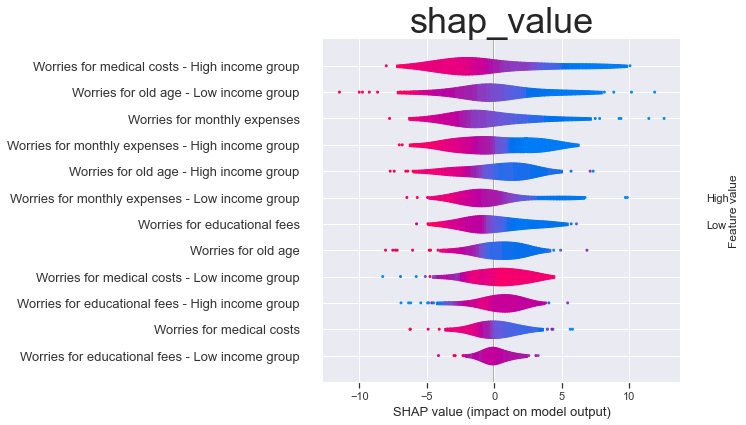

In [118]:
plt.figure(figsize=(5,10))
shap.summary_plot(df_sub.values, finance_sub[df_sub.columns], plot_type='violin',  show=False)
plt.title('shap_value')
plt.show()

In [134]:
worried_problems = ['Worried about not having enough money for monthly expenses or bills',
                   'Worried about not being able to pay for medical costs in case of a serious illness or accident',
                   'Worried about not having enough money for old age',
                   'Worried about not being able to pay school fees or fees for education']

df_mean = pd.DataFrame(index=['More answer worried - Negative Impact', 'Less answer worried - Positive Impact'])
for i in df_sub.columns:
    print(i)
    df_mean[i]=0
    avg = finance_sub[i].mean()
    print(avg)
    df_mean[i].loc['More answer worried - Negative Impact'] = df_sub[df_sub.index.isin(finance_sub[finance_sub[i]>avg].index)][i].mean()
    df_mean[i].loc['Less answer worried - Positive Impact'] = df_sub[df_sub.index.isin(finance_sub[finance_sub[i]<avg].index)][i].mean()
df_mean.T

Worries for monthly expenses
0.6456827113912864
Worries for medical costs
0.7470776289870793
Worries for old age
0.7154935971579769
Worries for educational fees
0.6145908391441811
Worries for monthly expenses - Low income group
0.7266829246909103
Worries for medical costs - Low income group
0.7956645481754094
Worries for old age - Low income group
0.7656113130125133
Worries for educational fees - Low income group
0.6835689288479361
Worries for monthly expenses - High income group
0.5918576011942192
Worries for medical costs - High income group
0.7147867789661343
Worries for old age - High income group
0.6821890866214578
Worries for educational fees - High income group
0.5687635254114867



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

More answer worried - Negative Impact  \
Worries for monthly expenses                                                  -2.064868   
Worries for medical costs                                                     -0.845602   
Worries for old age                                                           -1.279909   
Worries for educational fees                                                  -1.615963   
Worries for monthly expenses - Low income group                               -1.550761   
Worries for medical costs - Low income group                                   0.813680   
Worries for old age - Low income group                                        -2.217127   
Worries for educational fees - Low income group                               -0.215445   
Worries for monthly expenses - High income group                              -1.976139   
Worries for medical costs - High income group                                 -2.386855   
Worries for old age - High income group                                       -1.750391   
Worries for educational fees - High income group                               0.800540   

                                                  Less answer worried - Positive Impact  
Worries for monthly expenses                                                   3.217353  
Worries for medical costs                                                      1.668350  
Worries for old age                                                            1.780743  
Worries for educational fees                                                   1.939156  
Worries for monthly expenses - Low income group                                2.326142  
Worries for medical costs - Low income group                                  -1.605369  
Worries for old age - Low income group                                         3.589634  
Worries for educational fees - Low income group                                0.299750  
Worries for monthly expenses - High income group                               2.749410  
Worries for medical costs - High income group                                  4.176996  
Worries for old age - High income group                                        2.528343  
Worries for educational fees - High income group                              -0.996591

In [128]:
finance_sub[finance_sub['Worries for monthly expenses']<avg].index

Index(['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Canada', 'China', 'Croatia', 'Czech Republic', 'Estonia', 'France',
       'Germany', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kyrgyz Republic', 'Latvia',
       'Malta', 'Netherlands', 'New Zealand', 'Saudi Arabia', 'Serbia',
       'Slovenia', 'Spain', 'Switzerland', 'Thailand', 'United Kingdom',
       'United States', 'Uzbekistan'],
      dtype='object', name='Country Name')

In [123]:
df_mean = pd.DataFrame(index=['More answer worried - Negative Impact', 'Less answer worried - Positive Impact'])
for i in df_sub.columns:
    df_mean[i]=0
    avg = finance_sub[i].mean()

In [71]:
df_sub2 = pd.DataFrame(index=df.index)
for i in worried_problems:
    df_sub2[[x for x in df.columns if (i in x) and (('income' in x) or (',' not in x))]] = df[[x for x in df.columns if (i in x) and (('income' in x) or (',' not in x))]]
# df_sub2['Contribution of 460 other features'] = df[[x for x in df.columns if x not in df_sub2.columns]].sum(axis=1)
df_sub3=df_sub2
df_sub2 = df_sub2.rename(columns={
'Worried about not having enough money for monthly expenses or bills: worried (% age 15+)': 'Worries for monthly expenses',
# 'Worried about not having enough money for monthly expenses or bills: worried, income, richest 60% (% age 15+)': 'Worries for monthly expenses - Highest income',
# 'Worried about not having enough money for monthly expenses or bills: worried, income, poorest 40% (% age 15+)': 'Worries for monthly expenses - Lowest income',
'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried (% age 15+)':'Worries for medical costs',
# 'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, richest 60% (% age 15+)': 'Worries for medical costs - Highest income',
# 'Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, poorest 40% (% age 15+)': 'Worries for medical costs - Lowest income',
'Worried about not having enough money for old age: worried (% age 15+)':'Worries for old age',
# 'Worried about not having enough money for old age: worried, income, richest 60% (% age 15+)': 'Worries for old age - Highest income',
# 'Worried about not having enough money for old age: worried, income, poorest 40% (% age 15+)': 'Worries for old age - Lowest income',
'Worried about not being able to pay school fees or fees for education: worried (% age 15+)':'Worries for educational fees',
# 'Worried about not being able to pay school fees or fees for education: worried, income, richest 60% (% age 15+)': 'Worries for educational fees - Highest income',
# 'Worried about not being able to pay school fees or fees for education: worried, income, poorest 40% (% age 15+)': 'Worries for educational fees - Lowest income'
})
df_sub2

Worries for monthly expenses  Worries for medical costs  \
Country Name                                                                  
Algeria                                 0.750243                  -4.488417   
Argentina                               4.005972                  -1.934599   
Armenia                                 0.255857                  -2.575603   
Australia                              -3.320661                  -5.845604   
Austria                                -2.626010                  -2.558551   
...                                          ...                        ...   
Uganda                                 -1.239106                   6.896627   
United Kingdom                         -5.150901                  -5.785802   
Uruguay                                -0.268672                  -4.922048   
Uzbekistan                             -2.573756                   4.487978   
West Bank and Gaza                      0.532667                  -0.490940   

                    Worries for old age  Worries for educational fees  
Country Name                                                           
Algeria                       -0.930119                     -1.170858  
Argentina                      0.773795                      2.103319  
Armenia                        3.043961                     -0.288936  
Australia                      6.648918                     -0.800738  
Austria                        6.336283                      0.161449  
...                                 ...                           ...  
Uganda                        -6.959952                     -0.594994  
United Kingdom                13.046260                     -0.093145  
Uruguay                        1.109169                      3.090302  
Uzbekistan                     0.500649                     -0.378077  
West Bank and Gaza             0.888329                      0.629232  

[93 rows x 4 columns]

<AxesSubplot:>

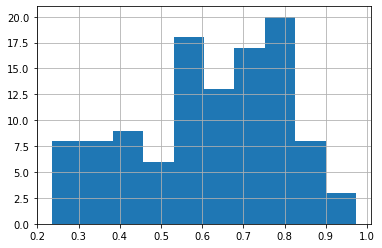

In [35]:
finance_sub['Worries for educational fees'].hist()

In [135]:
def plot_shap_finance(column):
    df_plot = pd.DataFrame(index=df_sub.index)
    df_plot['shapley value'] = df_sub[column]
    df_plot[column] = finance_sub[column]
    finance_mean = df_plot[column].mean()
    df_plot[column+' '] = df_plot[column]>finance_mean
    df_plot[column+' '] = df_plot[column+' '].replace({True:'>Threshold', False:'<=Threshold'})
    plt.figure(figsize=(30,10))
    sns.set(font_scale=3)
    sns.scatterplot(data=df_plot, y=column, x='shapley value', hue=column+' ', s=300)
    plt.axhline(y = finance_mean, color = 'r', linestyle = '-.')
    plt.text(df_plot['shapley value'].max()-2.5, finance_mean+0.05, 'Threshold ('+str(np.round(finance_mean,2))+')', ha ='left', va ='center')
    plt.axvline(x = 0, linestyle = '--')
    plt.legend(title='Worries', loc='lower left', markerscale=5)
    plt.ylabel('Worries')
    plt.title(column)
    plt.show()

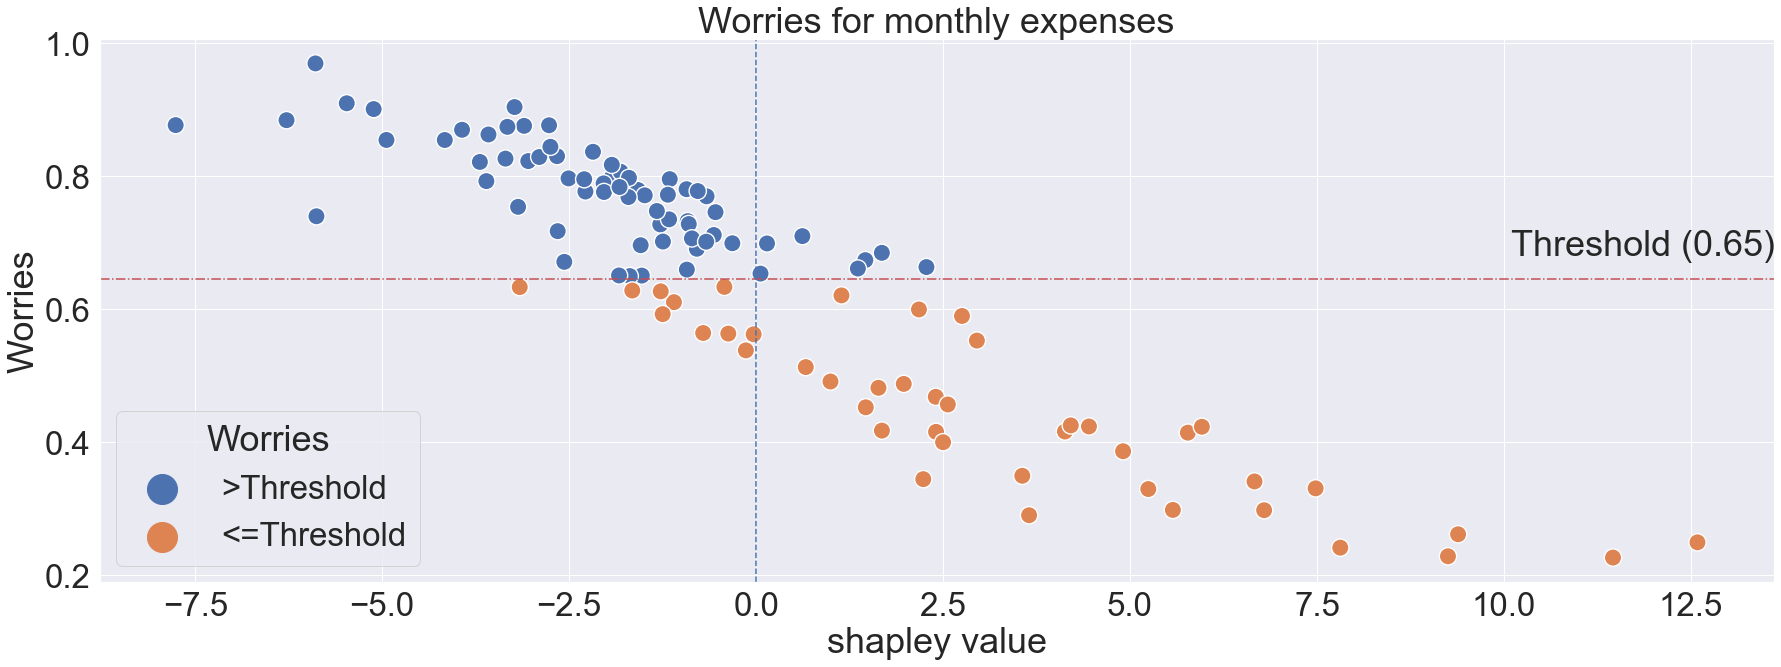

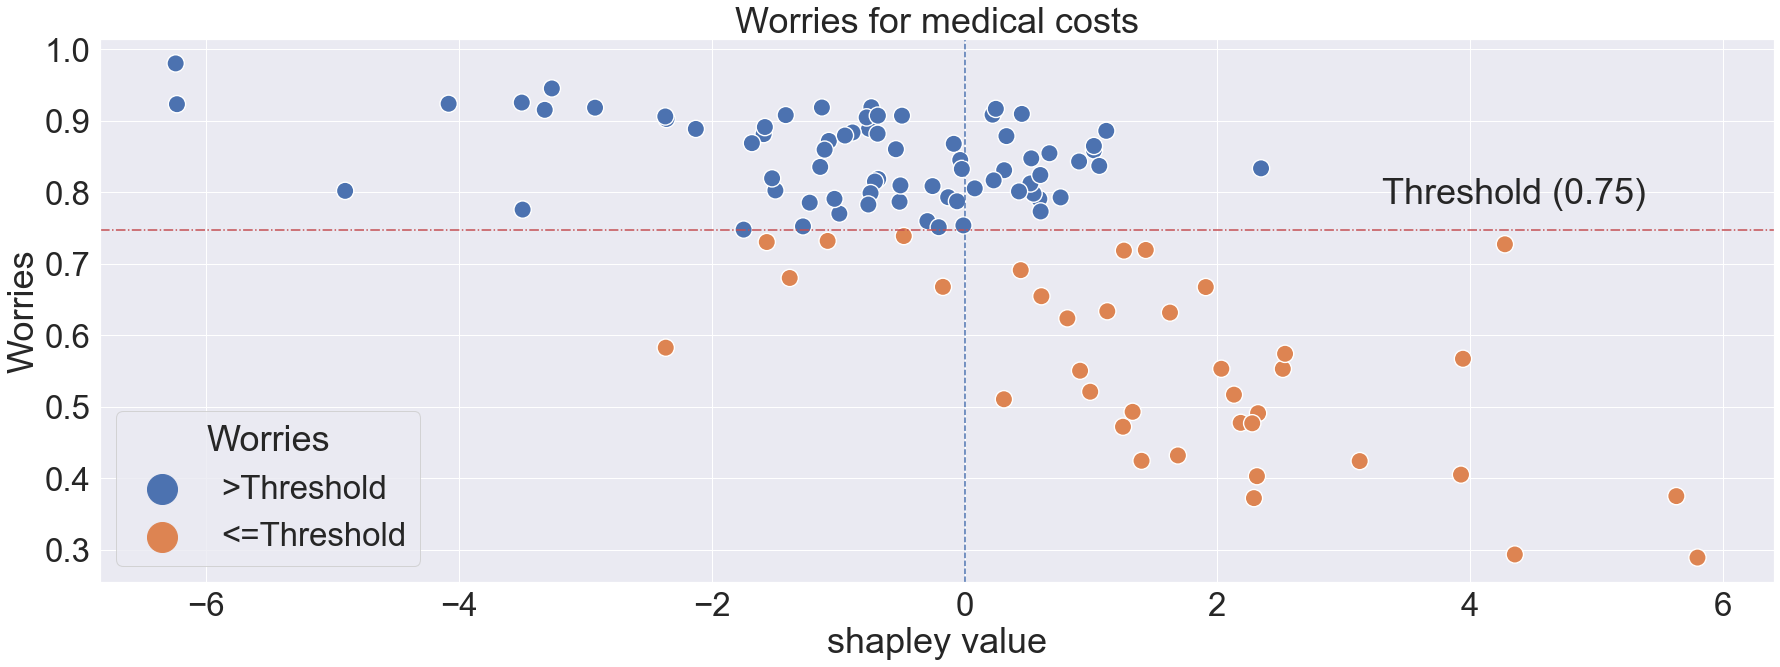

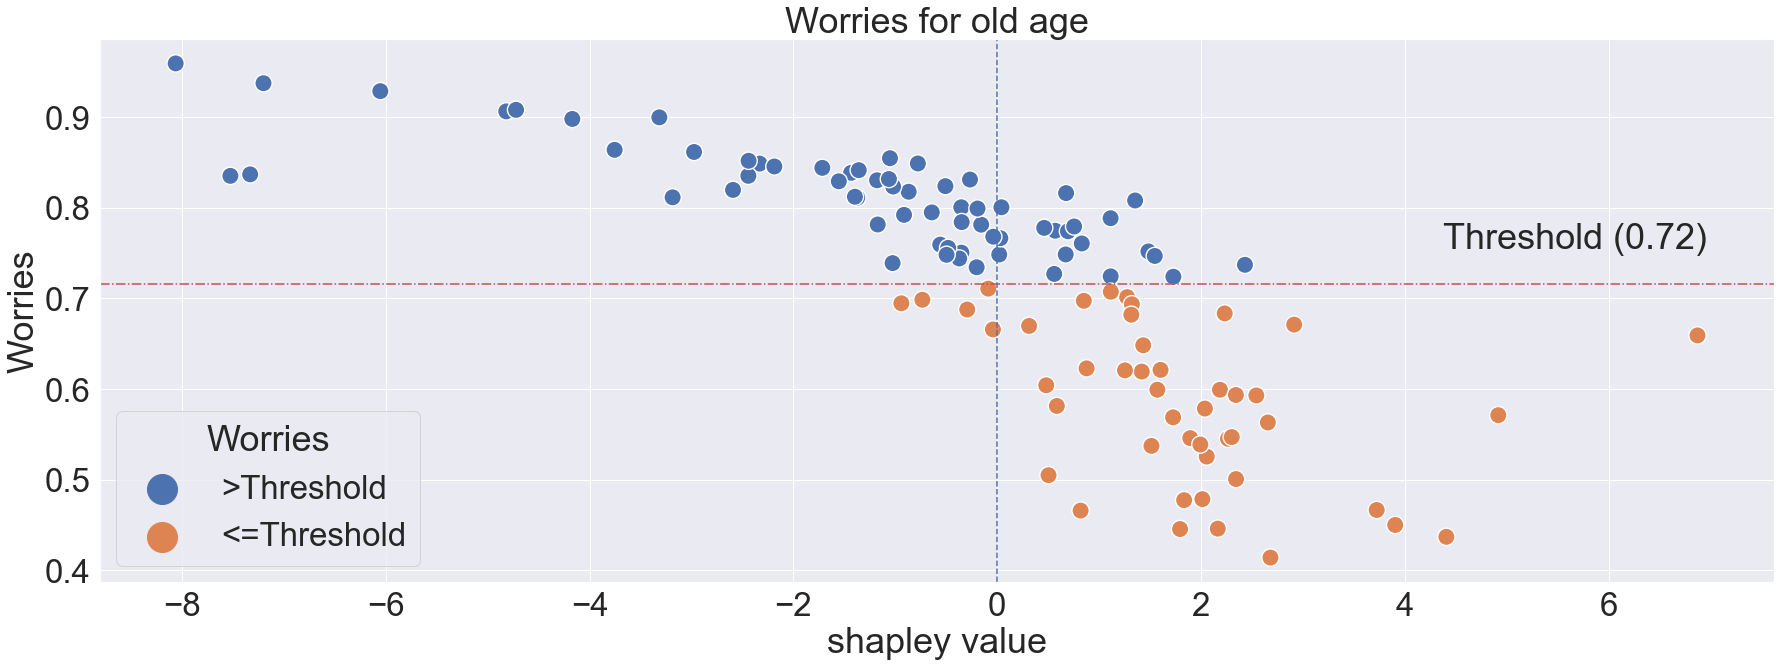

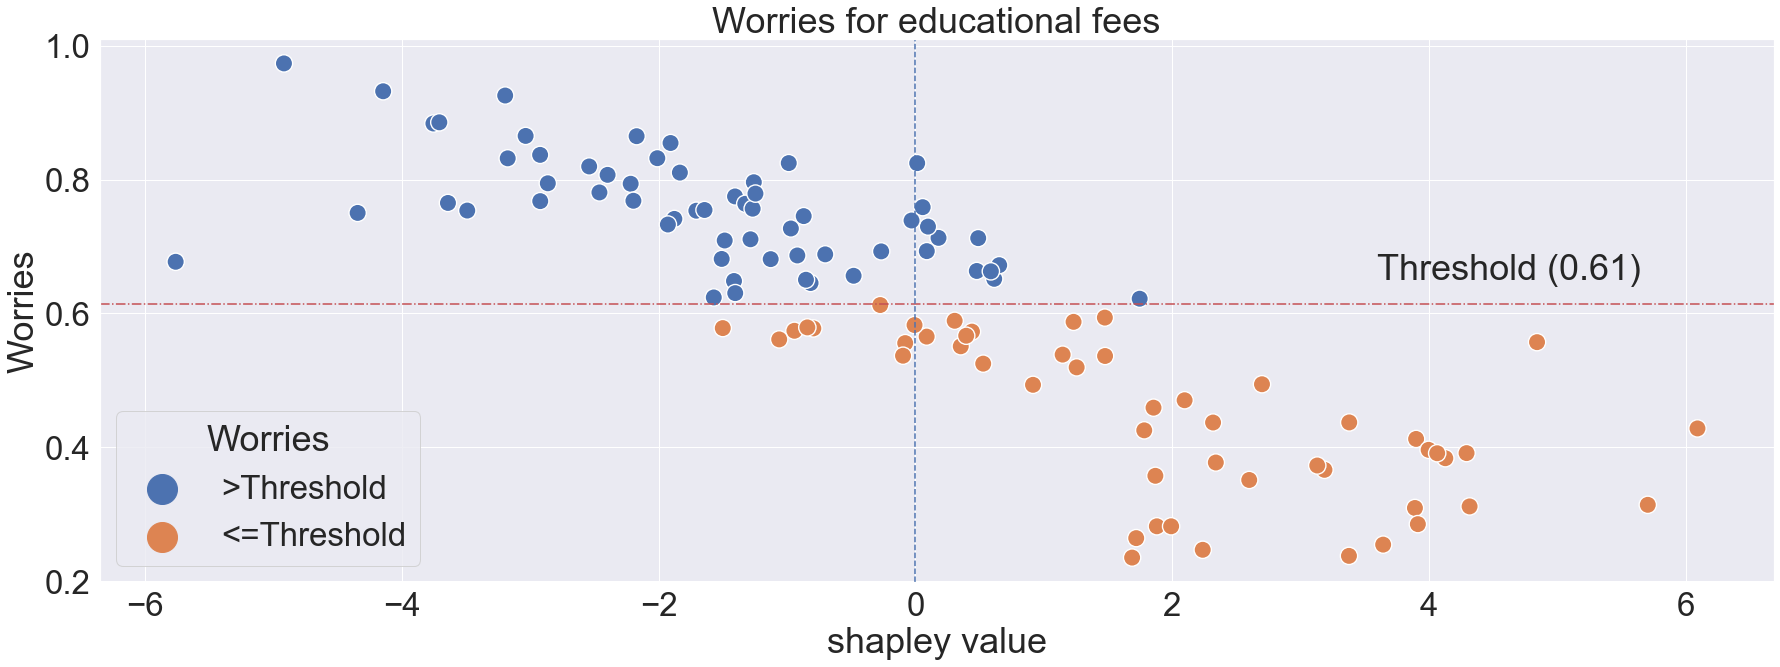

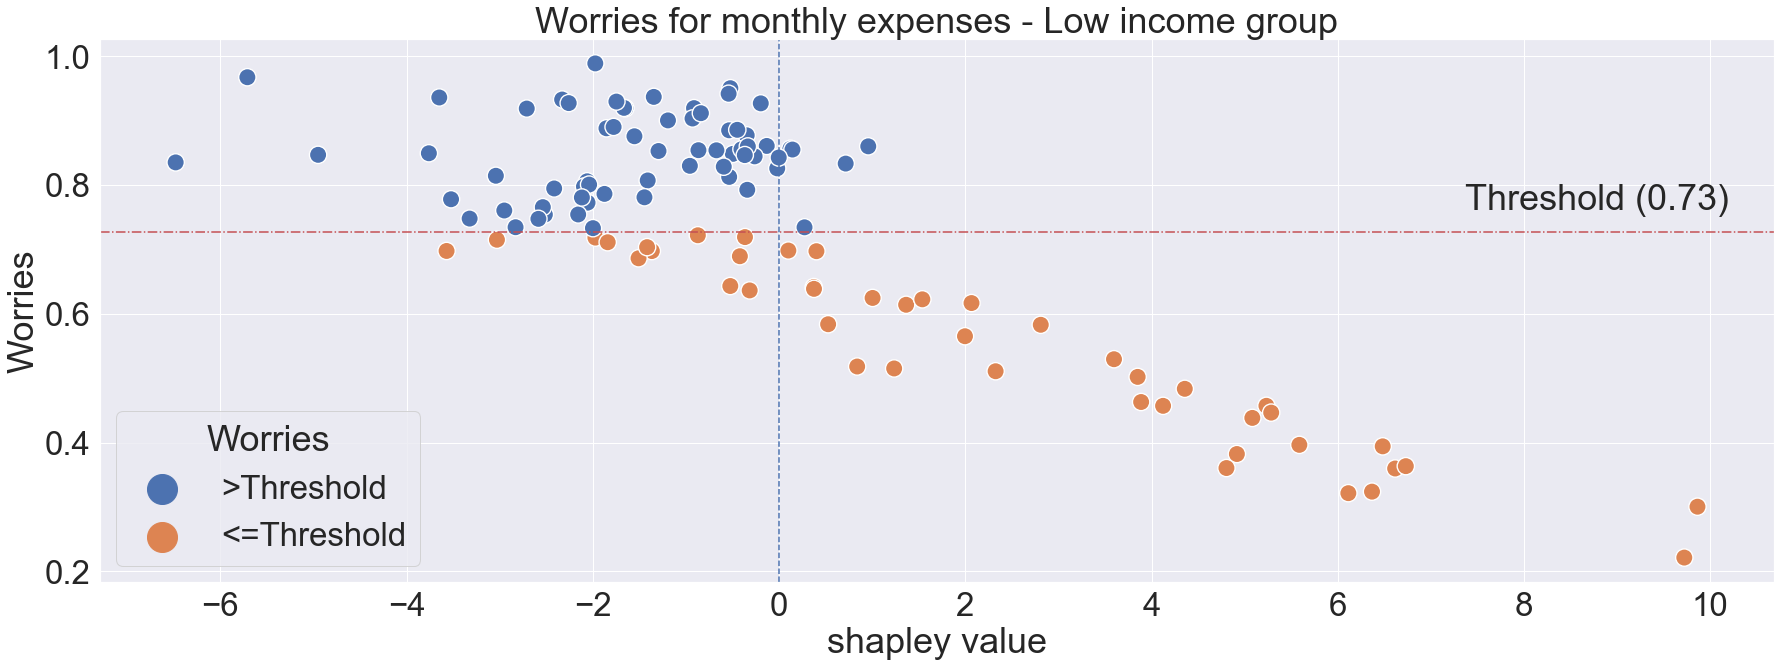

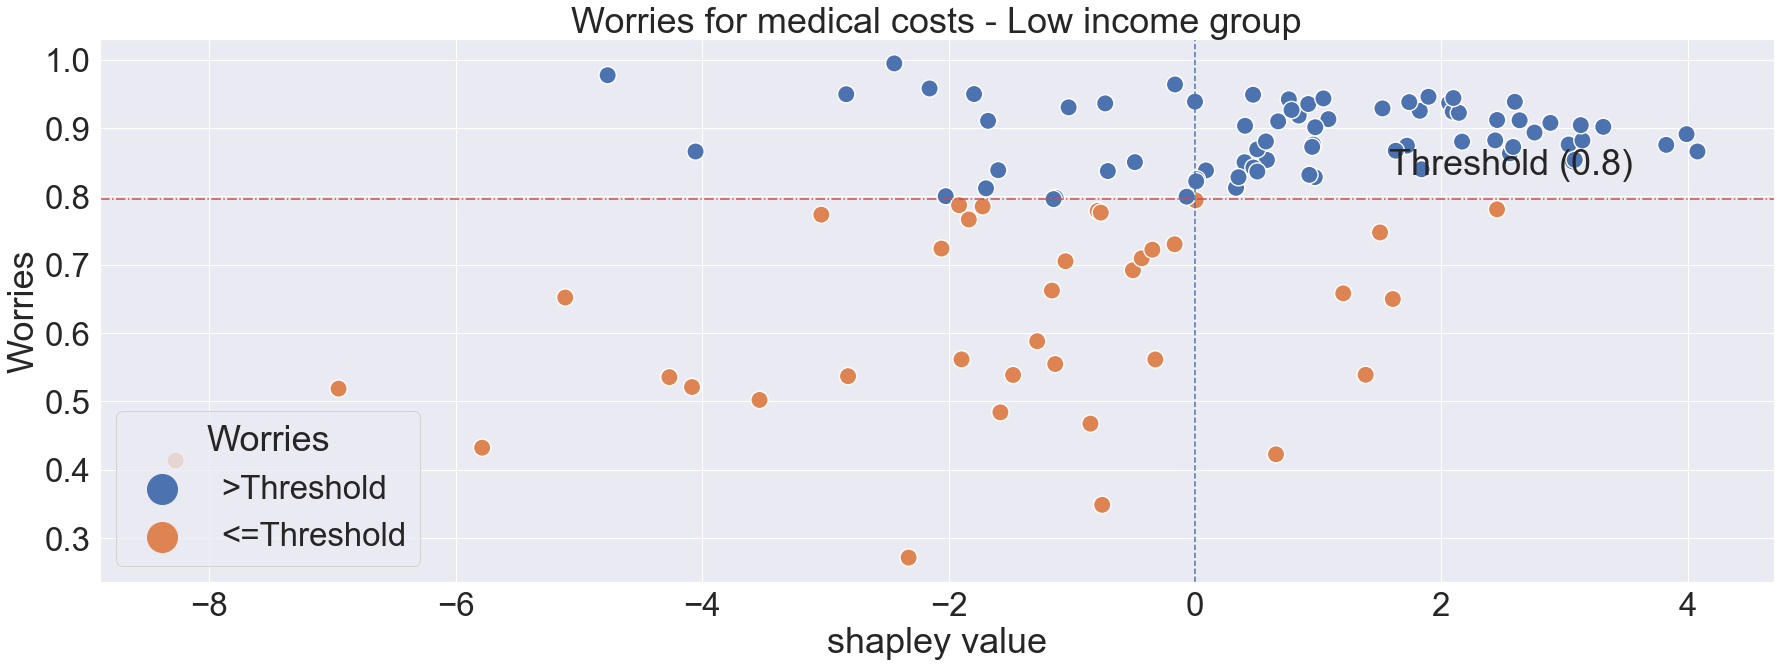

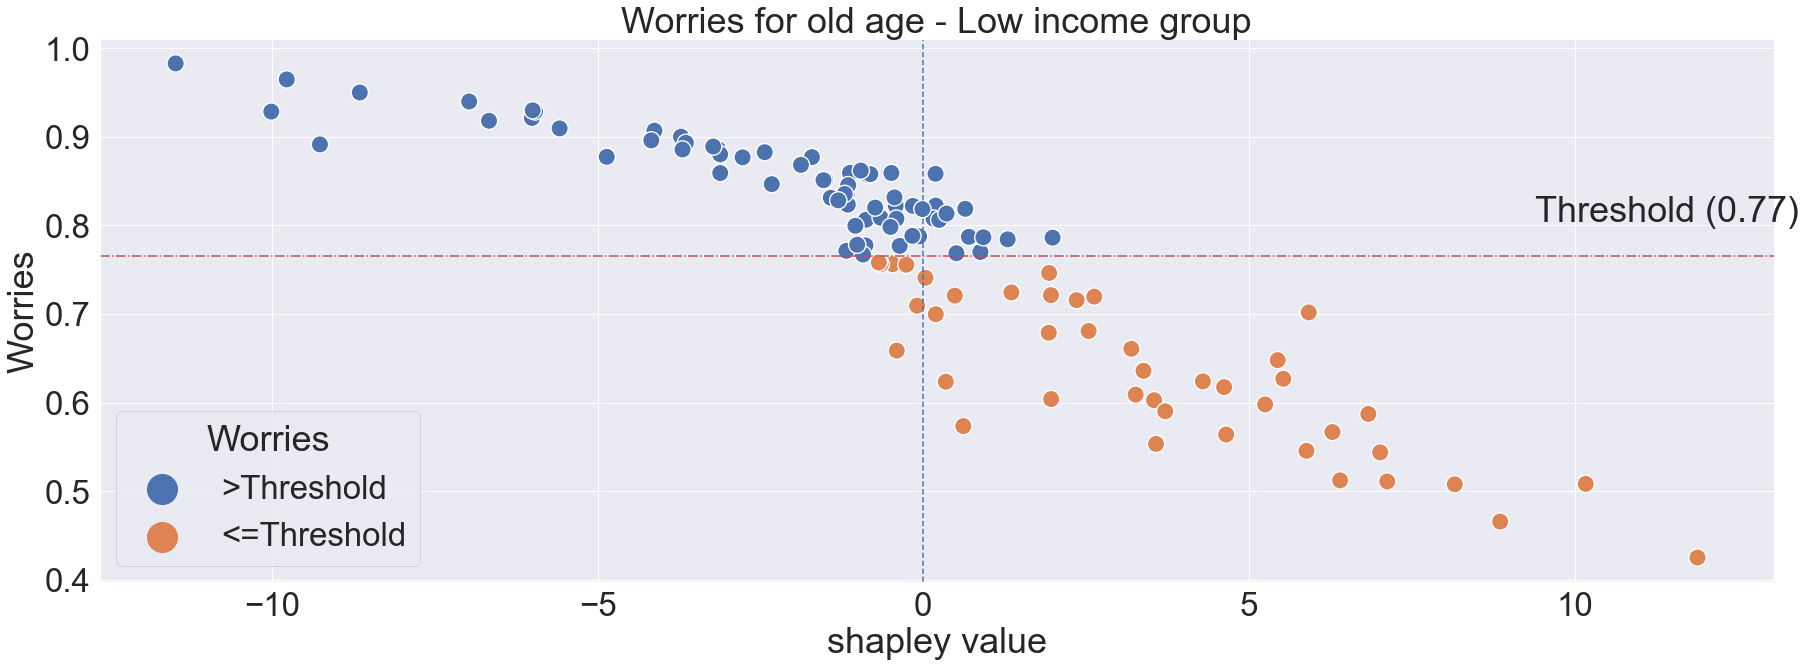

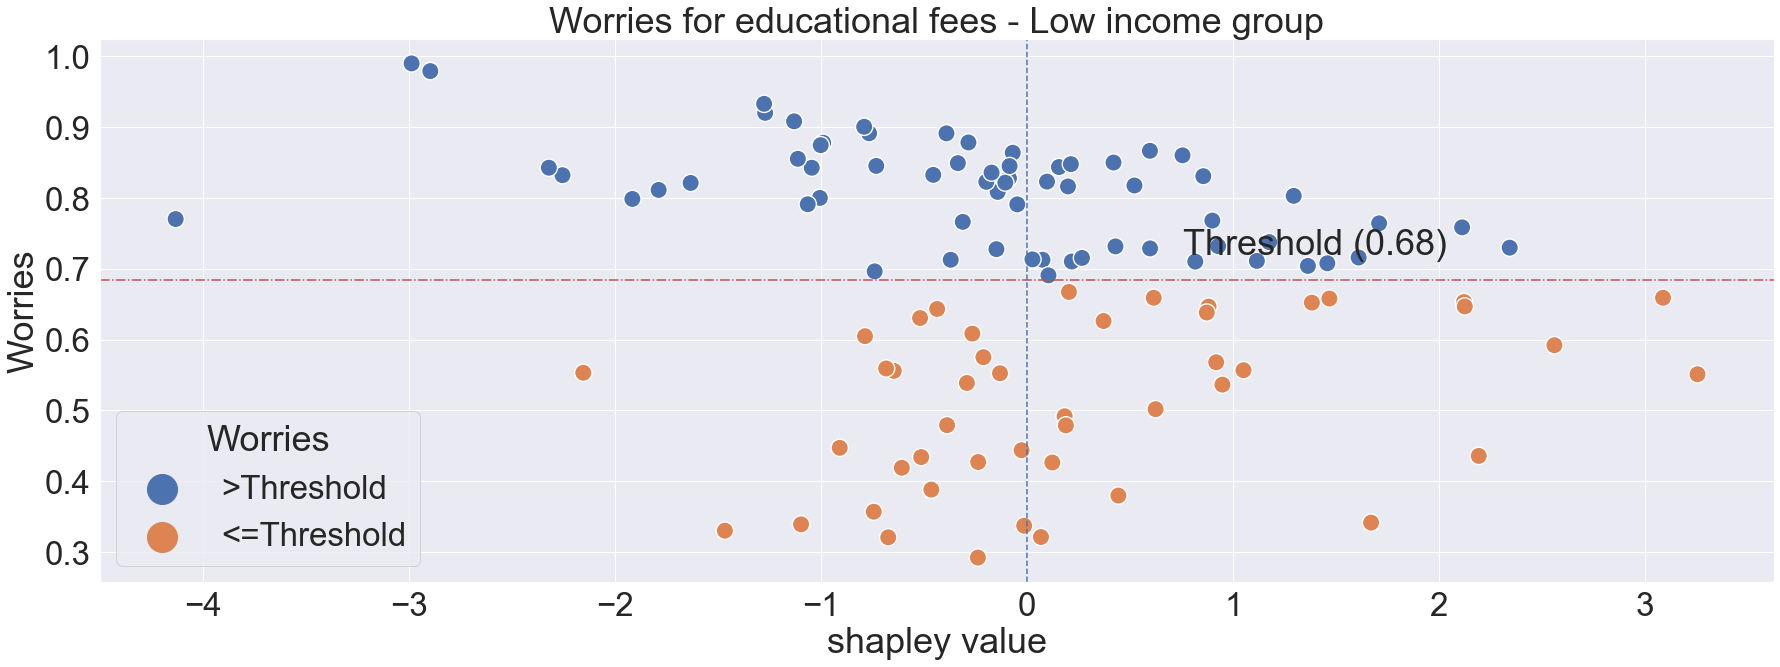

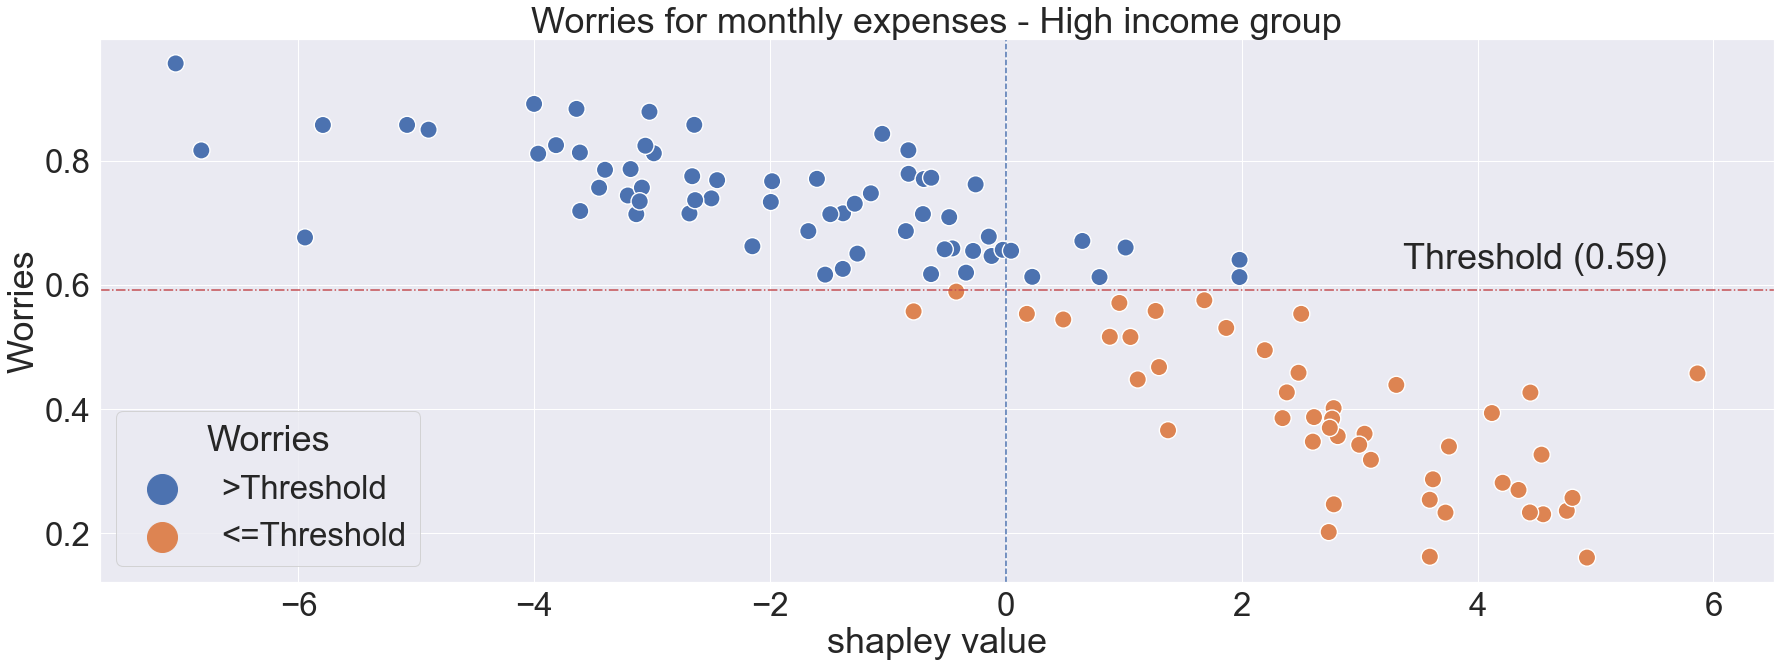

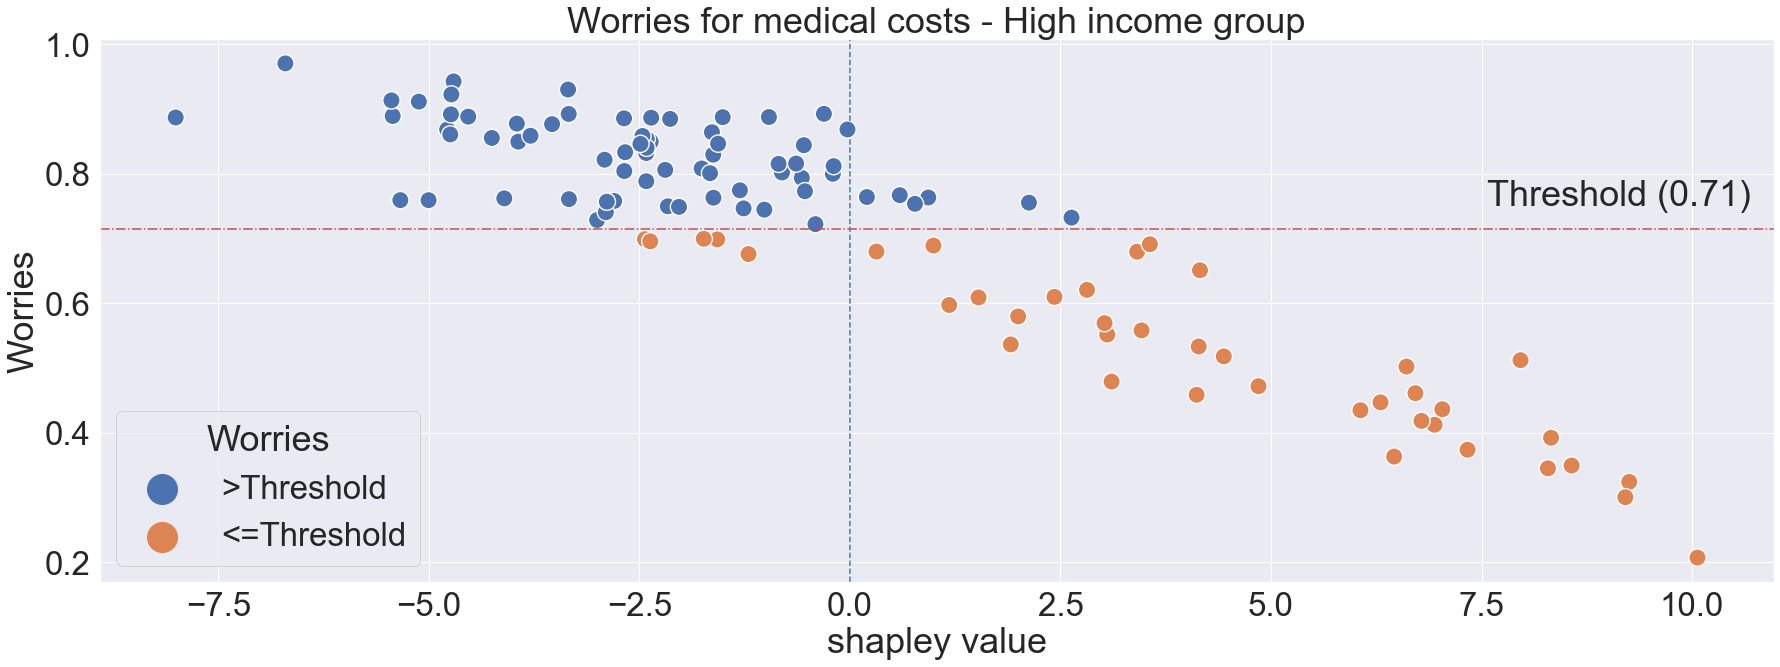

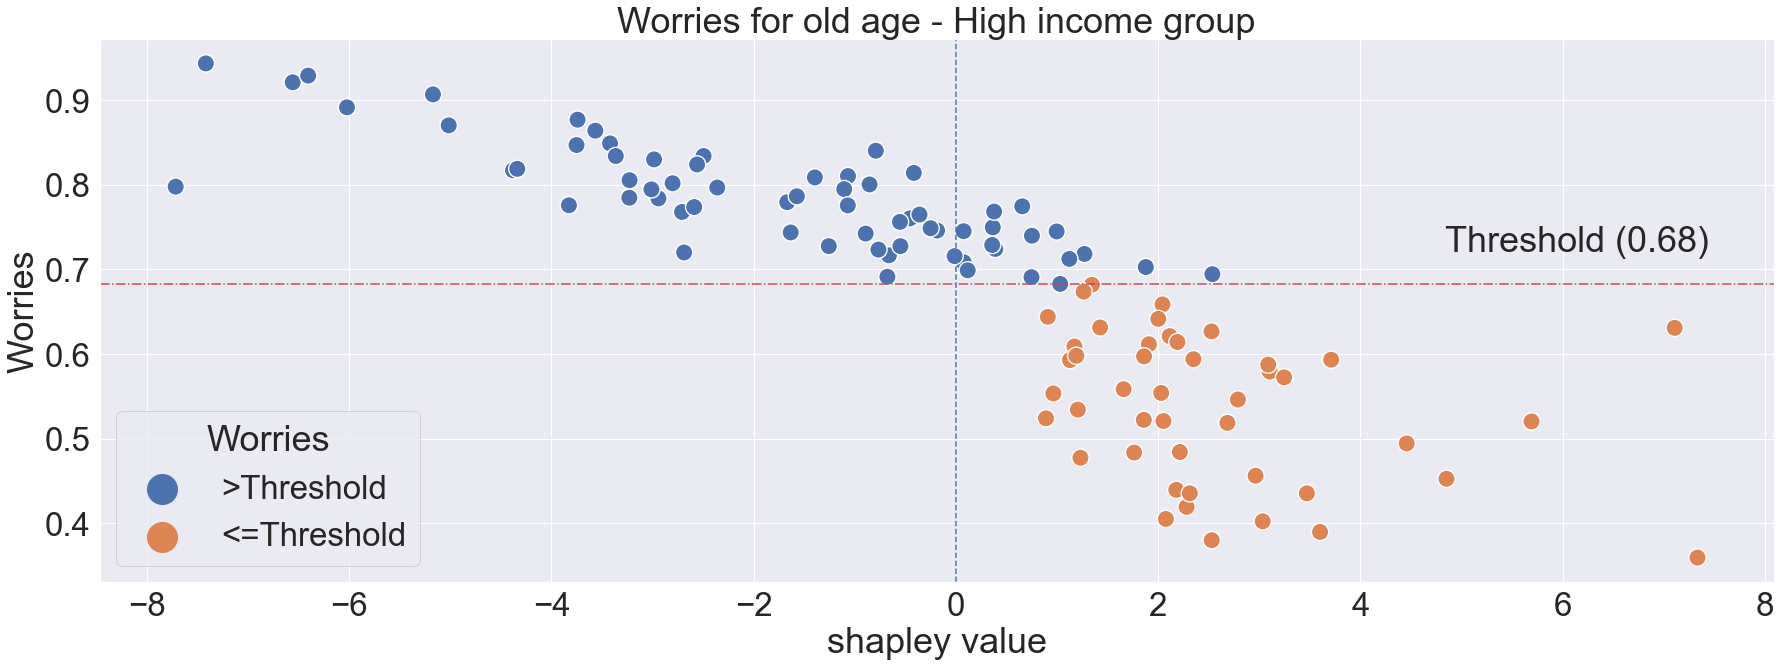

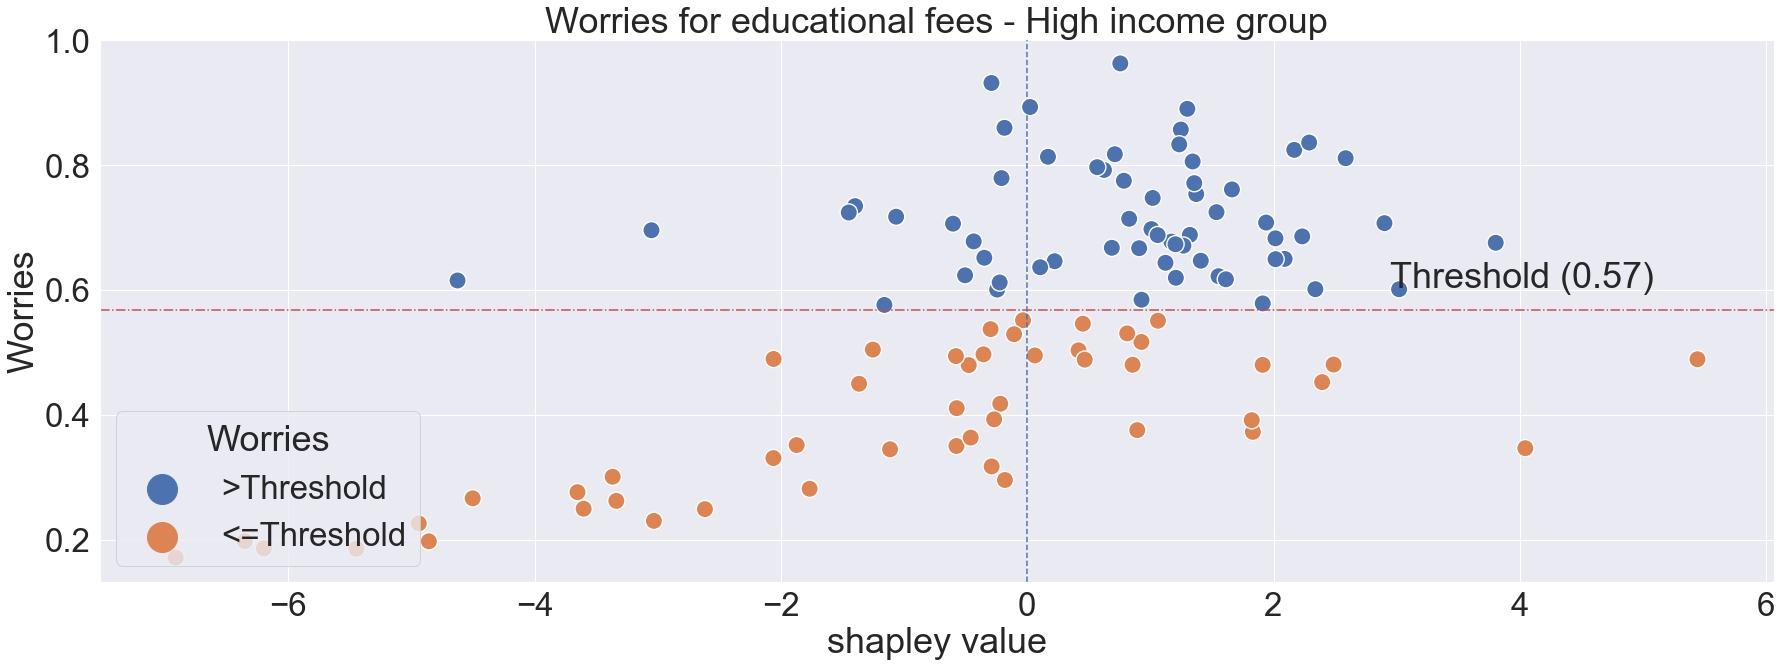

In [136]:
for i in df_sub.columns:
    plot_shap_finance(i)

In [96]:
output = pd.read_csv('output.csv')
output

Country Name  \
0               Albania   
1               Algeria   
2             Argentina   
3               Armenia   
4             Australia   
..                  ...   
105             Uruguay   
106          Uzbekistan   
107  West Bank and Gaza   
108              Zambia   
109            Zimbabwe   

     Worried about not having enough money for monthly expenses or bills: worried (% age 15+)  \
0                                             8.915867                                          
1                                             3.793920                                          
2                                            10.136454                                          
3                                             5.575854                                          
4                                             1.678053                                          
..                                                 ...                                          
105                                           4.452644                                          
106                                           7.415988                                          
107                                           6.342566                                          
108                                           3.560075                                          
109                                           5.651812                                          

     Worried about not being able to pay for medical costs in case of a serious illness or accident: worried (% age 15+)  \
0                                             8.315031                                                                     
1                                             4.407410                                                                     
2                                            10.054115                                                                     
3                                             5.752622                                                                     
4                                             1.793073                                                                     
..                                                 ...                                                                     
105                                           4.501872                                                                     
106                                           7.437056                                                                     
107                                           7.150442                                                                     
108                                           3.642193                                                                     
109                                           6.005838                                                                     

     Worried about not having enough money for old age: worried (% age 15+)  \
0                                             8.633428                        
1                                             3.972134                        
2                                             9.930549                        
3                                             5.795099                        
4                                             1.562234                        
..                                                 ...                        
105                                           4.469664                        
106                                           7.308687                        
107                                           6.977613                        
108                                           3.565412                        
109                                           5.909903                        

     Worried about not being able to pay school fees or fees for education: worried

In [98]:
output = output.rename(columns=columns)
output

Country Name  Worries for monthly expenses  \
0               Albania                      8.915867   
1               Algeria                      3.793920   
2             Argentina                     10.136454   
3               Armenia                      5.575854   
4             Australia                      1.678053   
..                  ...                           ...   
105             Uruguay                      4.452644   
106          Uzbekistan                      7.415988   
107  West Bank and Gaza                      6.342566   
108              Zambia                      3.560075   
109            Zimbabwe                      5.651812   

     Worries for medical costs  Worries for old age  \
0                     8.315031             8.633428   
1                     4.407410             3.972134   
2                    10.054115             9.930549   
3                     5.752622             5.795099   
4                     1.793073             1.562234   
..                         ...                  ...   
105                   4.501872             4.469664   
106                   7.437056             7.308687   
107                   7.150442             6.977613   
108                   3.642193             3.565412   
109                   6.005838             5.909903   

     Worries for educational fees  \
0                        9.325528   
1                        3.651954   
2                       10.122198   
3                        5.854402   
4                        3.172969   
..                            ...   
105                      4.339837   
106                      7.613821   
107                      6.404866   
108                      4.065482   
109                      5.413216   

     Worries for monthly expenses - Low income group  \
0                                           8.678966   
1                                           3.575044   
2                                          10.327511   
3                                           5.990377   
4                                           2.219524   
..                                               ...   
105                                         4.449478   
106                                         7.559890   
107                                         7.041576   
108                                         3.444738   
109                                         5.891004   

     Worries for medical costs - Low income group  \
0                                        8.579158   
1                                        3.831668   
2                                        9.971355   
3                                        5.726876   
4                                        1.682588   
..                                            ...   
105                                      4.598267   
106                                      7.387598   
107                                      6.978654   
108                                      3.576931   
109                                      5.719834   

     Worries for old age - Low income group  \
0                                  8.257928   
1                                  4.054251   
2                                 10.031146   
3                                  5.767454   
4                                  1.723477   
..                                      ...   
105                                4.570016   
106                                7.412044   
107                                6.826442   
108                                3.580994   
109                                5.764898   

     Worries for educational fees - Low income group  \
0                                           9.036251   
1                                           3.657333   
2                                          10.144227   
3                                           5.737257   
4                                           3.186511   
..       

In [103]:
shap.plots.force(base_value=5.4, shap_values=df_sub.values, features=finance_sub.values)

In [107]:
output.columns.tolist()

['Country Name',
 'Worries for monthly expenses',
 'Worries for medical costs',
 'Worries for old age',
 'Worries for educational fees',
 'Worries for monthly expenses - Low income group',
 'Worries for medical costs - Low income group',
 'Worries for old age - Low income group',
 'Worries for educational fees - Low income group',
 'Worries for monthly expenses - High income group',
 'Worries for medical costs - High income group',
 'Worries for old age - High income group',
 'Worries for educational fees - High income group']

In [73]:
import shap
from shap import Explanation
from shap.plots._waterfall import waterfall
exp = Explanation(df_sub2.values, 
                  np.full((len(output)), output['gdp_hat'].mean()), 
                  data=finance_sub_sub.values, 
                  feature_names=df_sub2.columns)

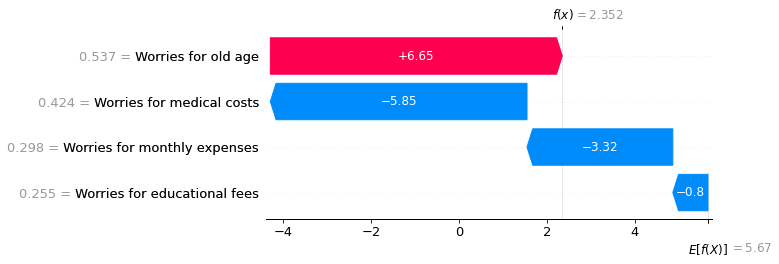

In [74]:
waterfall(exp[3], max_display=13)

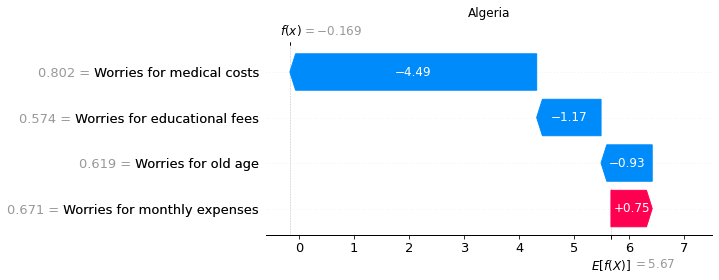

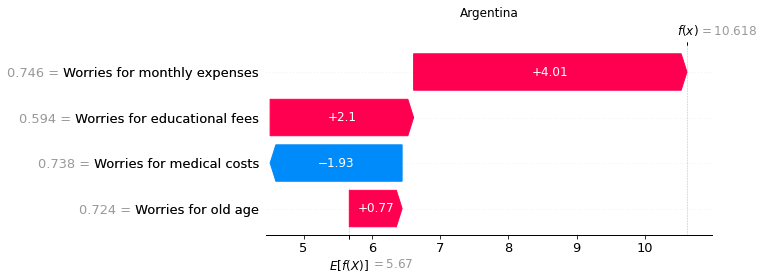

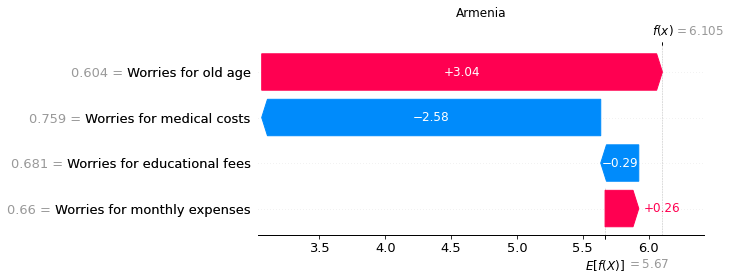

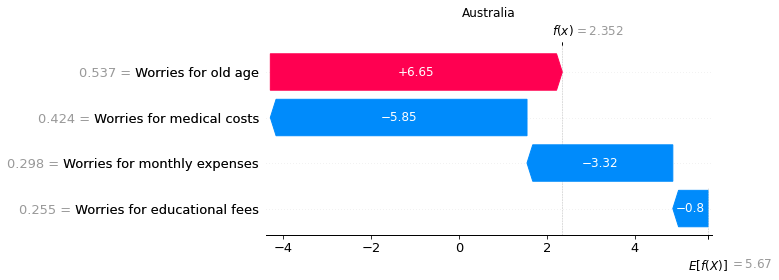

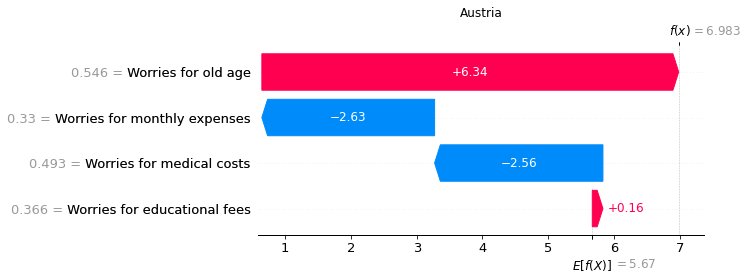

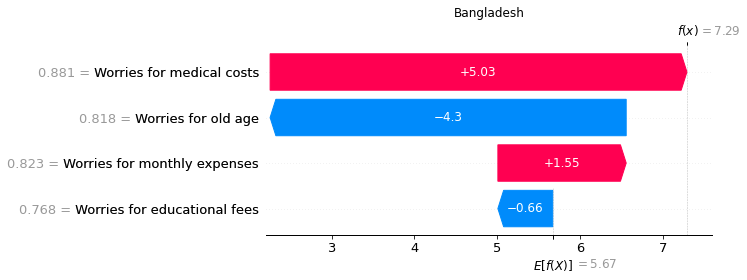

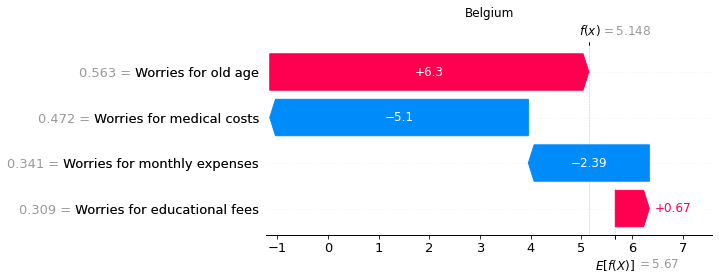

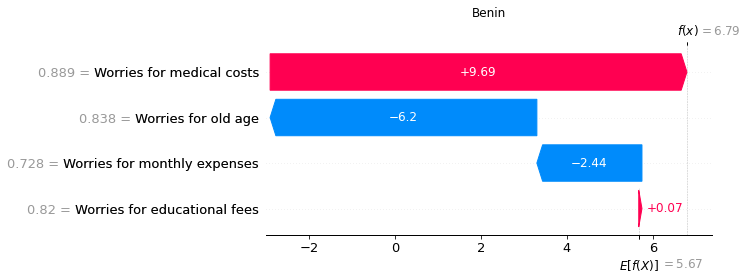

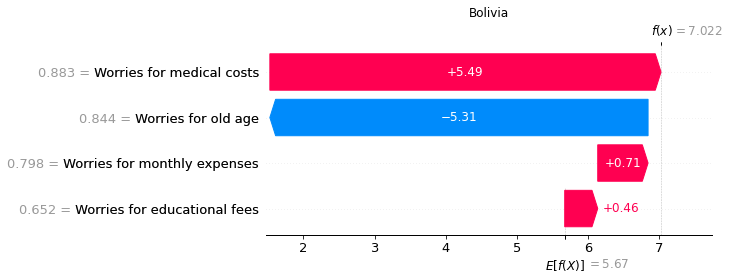

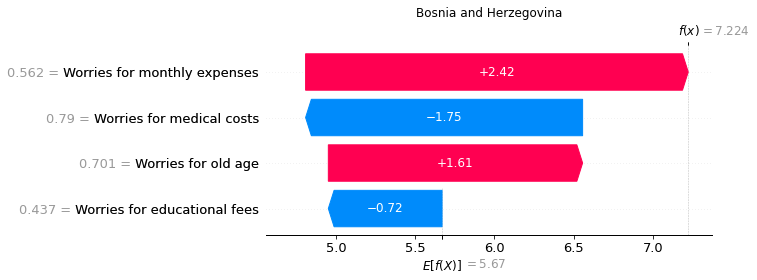

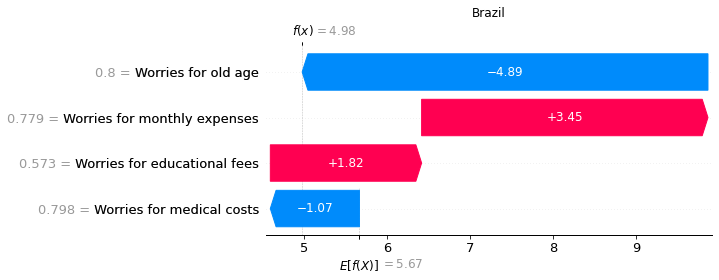

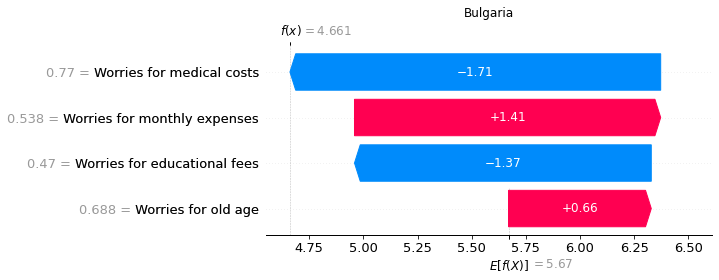

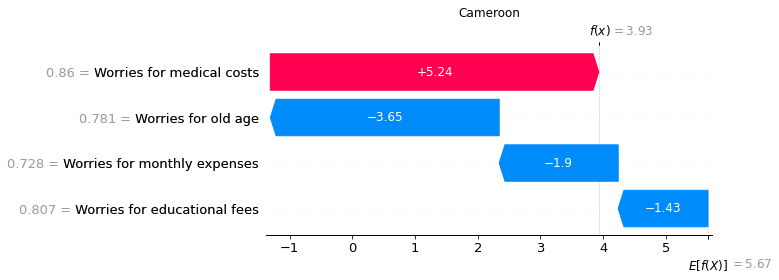

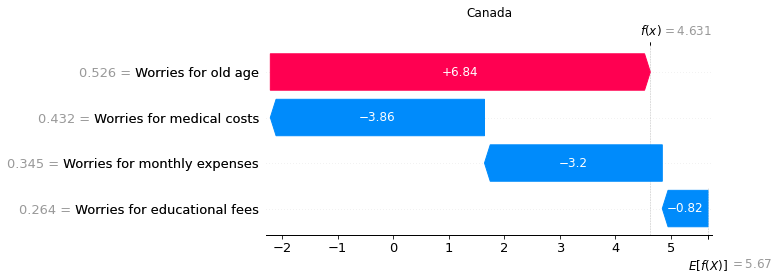

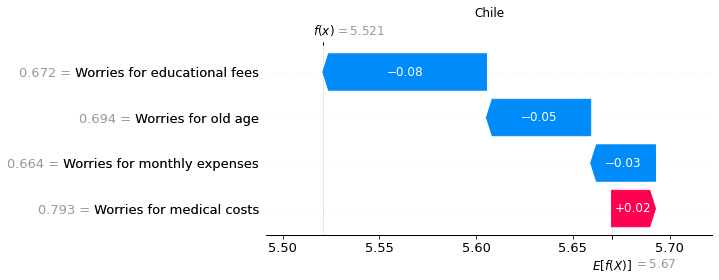

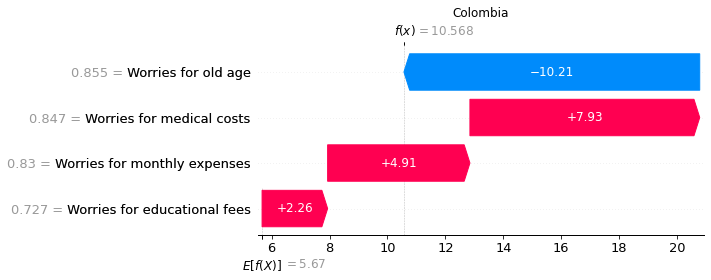

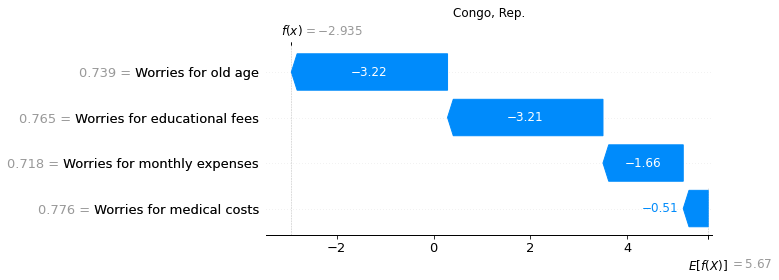

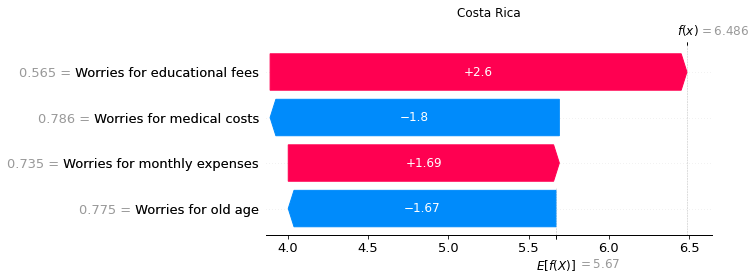

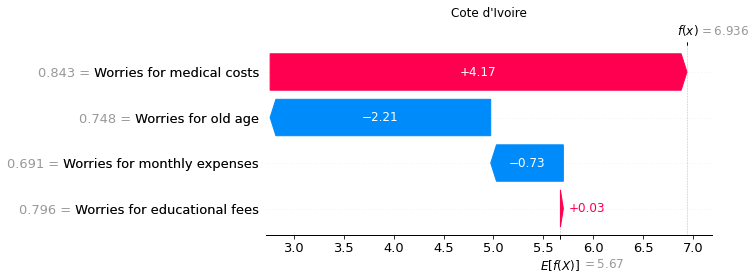

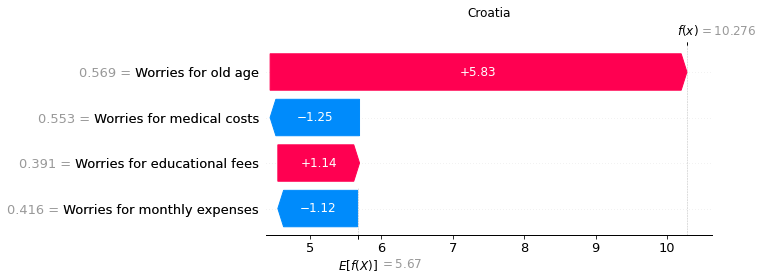

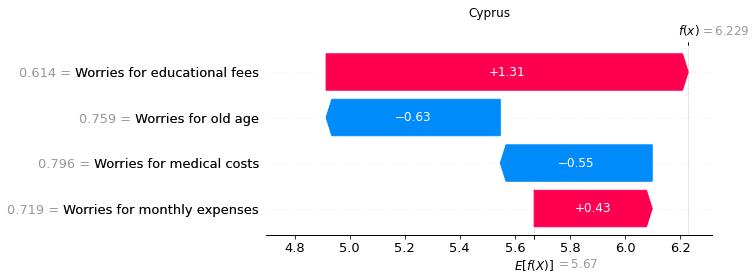

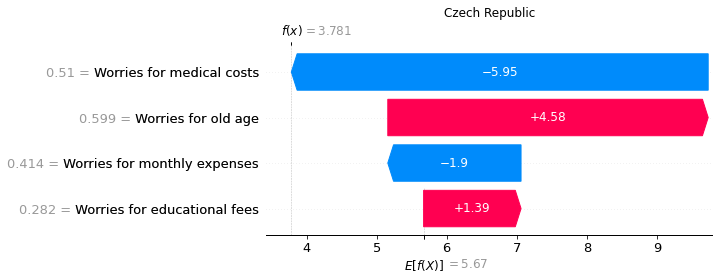

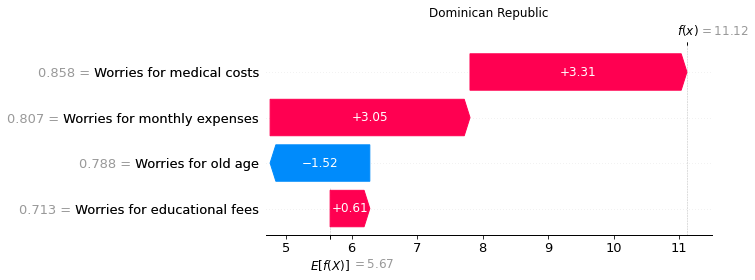

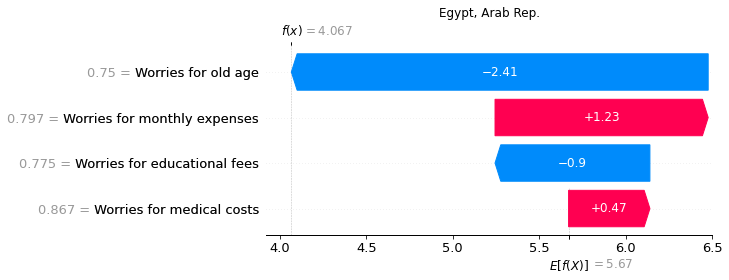

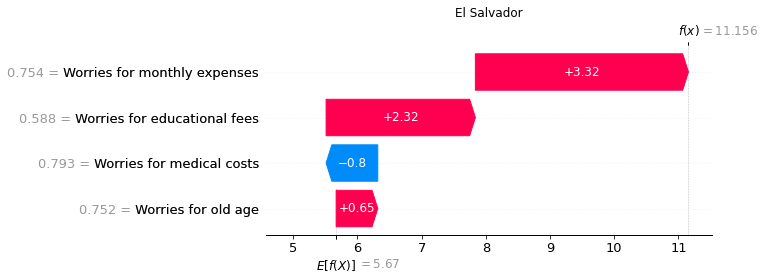

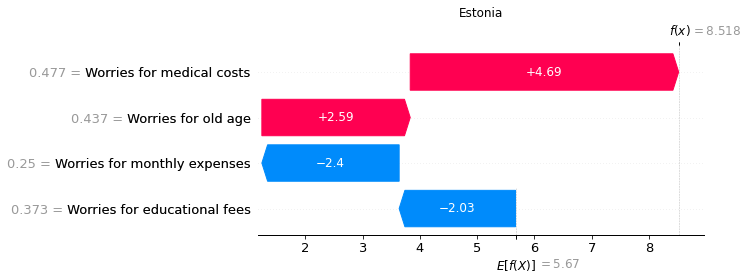

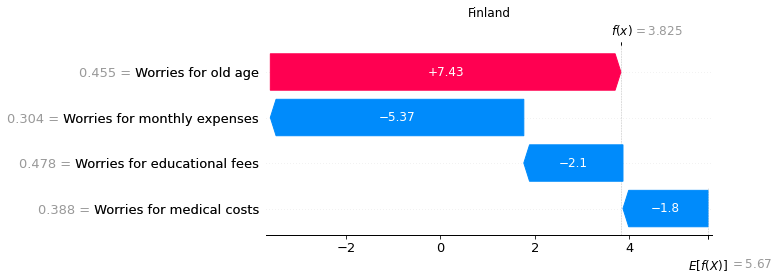

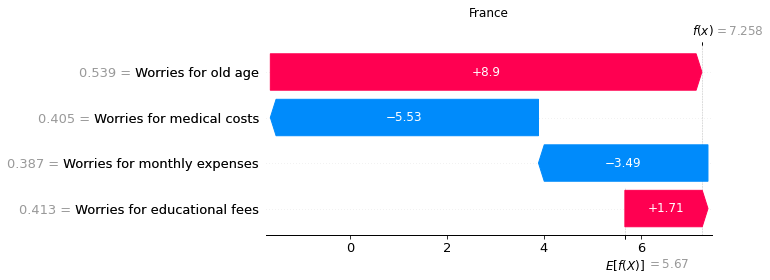

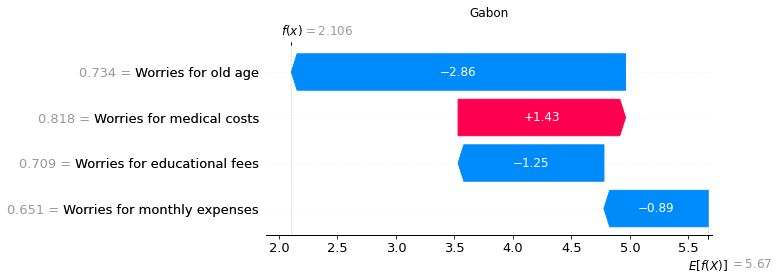

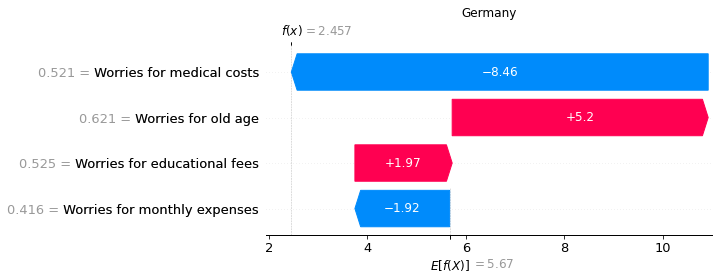

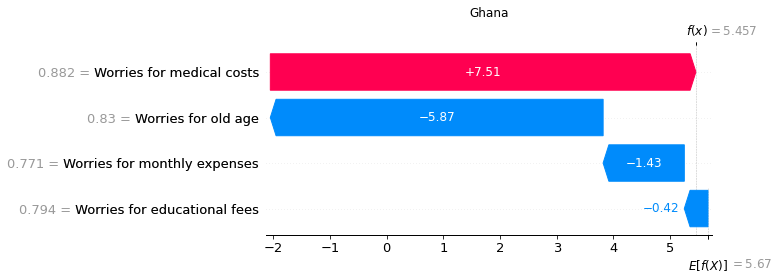

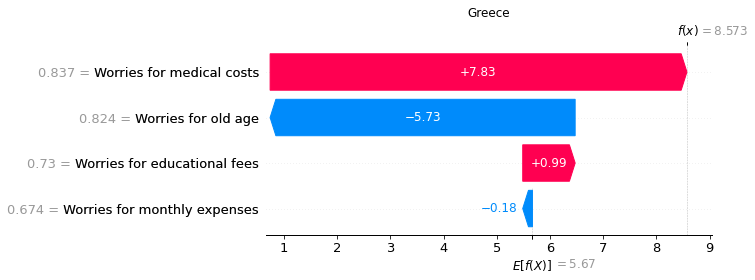

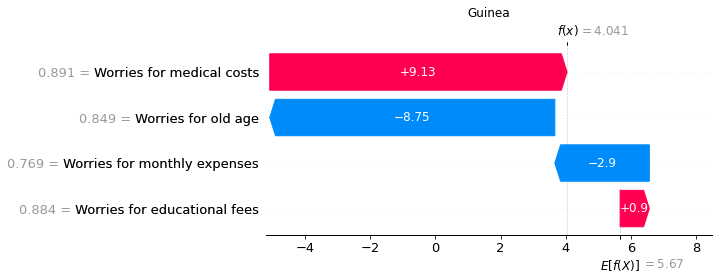

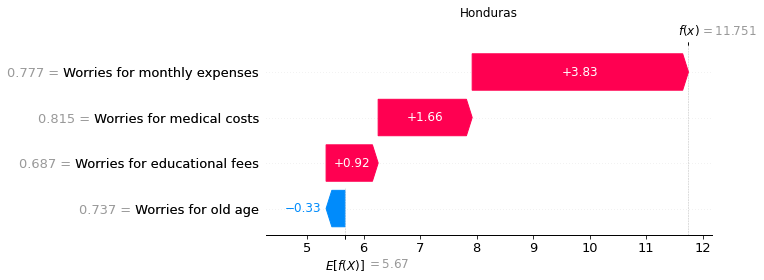

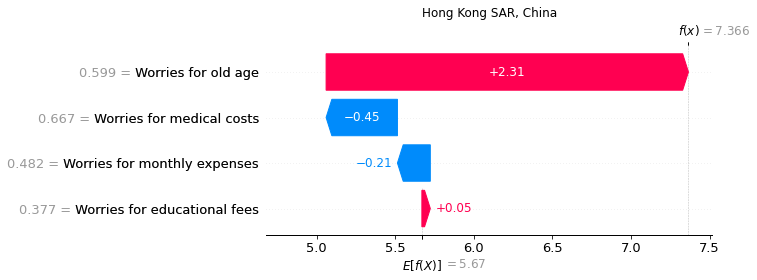

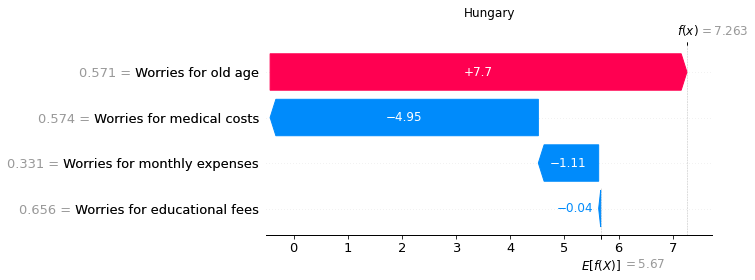

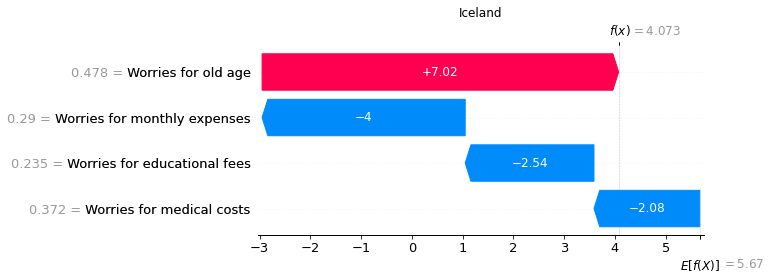

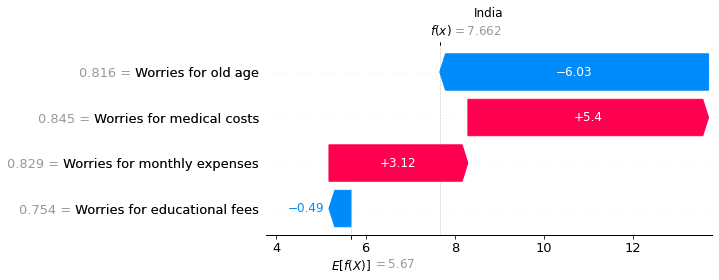

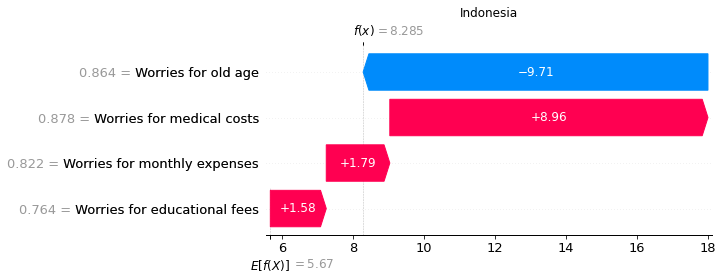

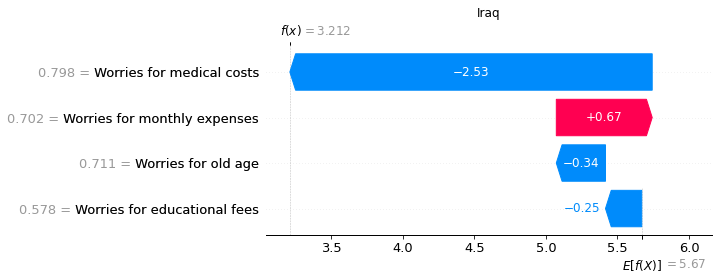

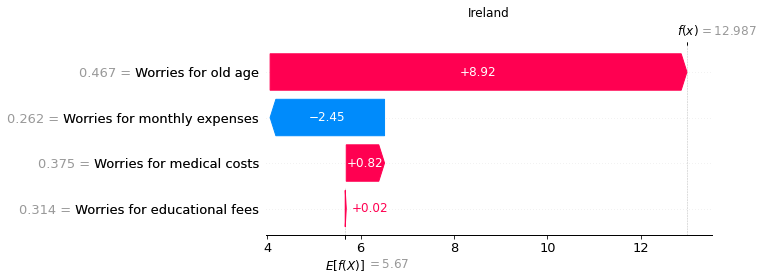

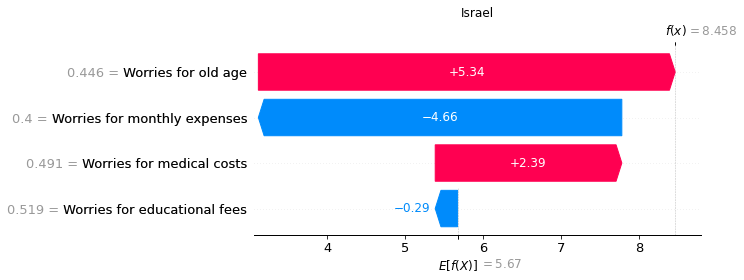

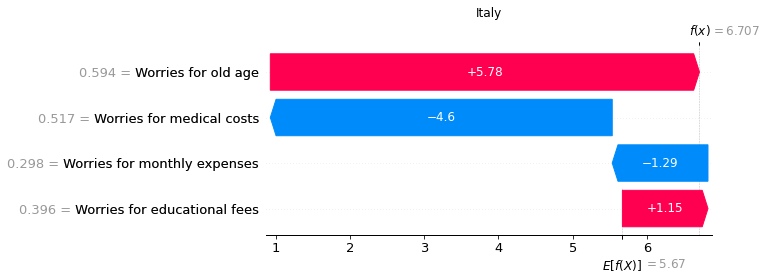

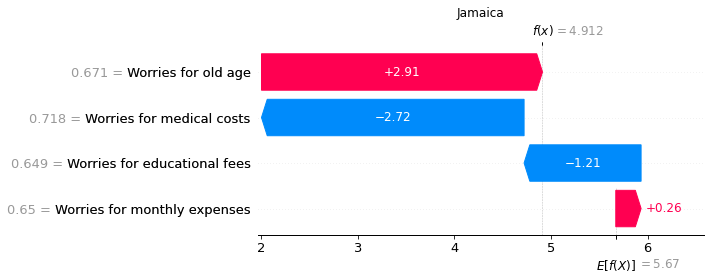

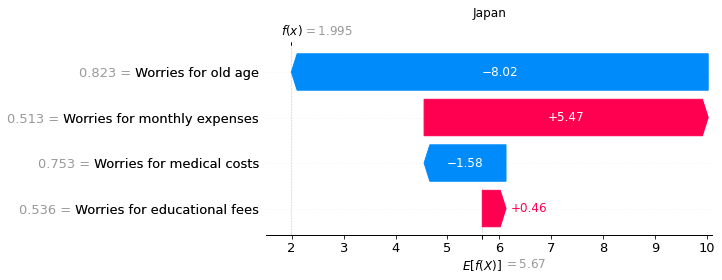

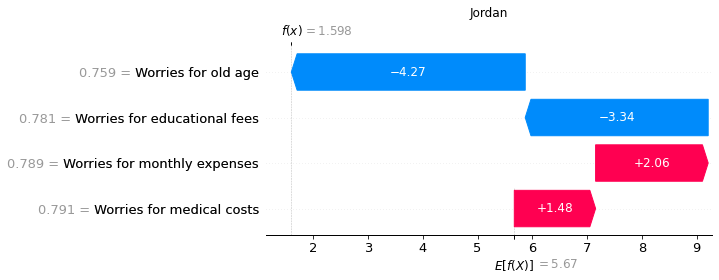

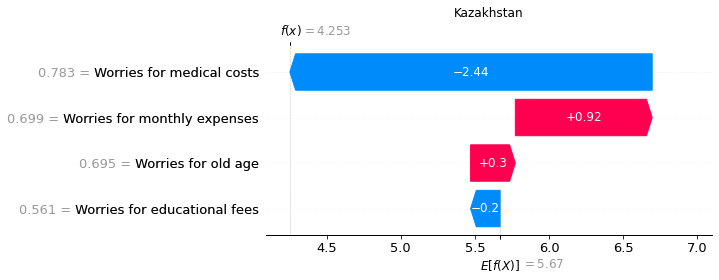

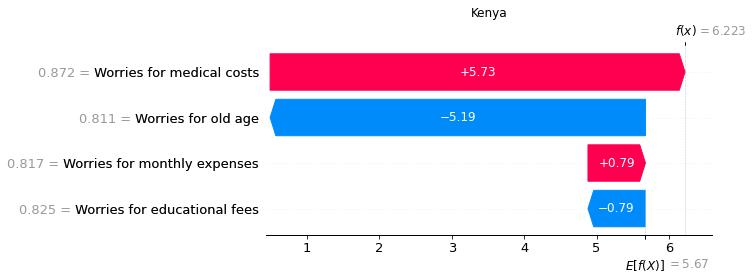

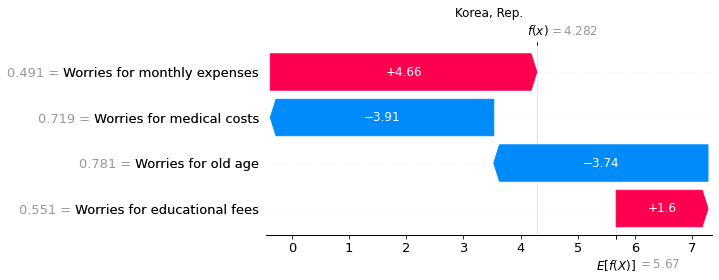

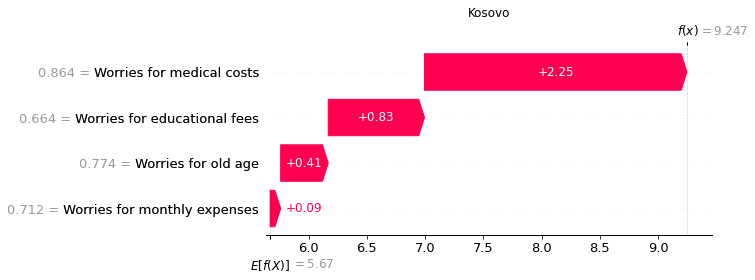

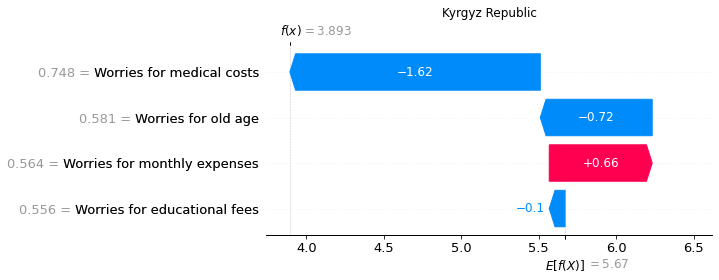

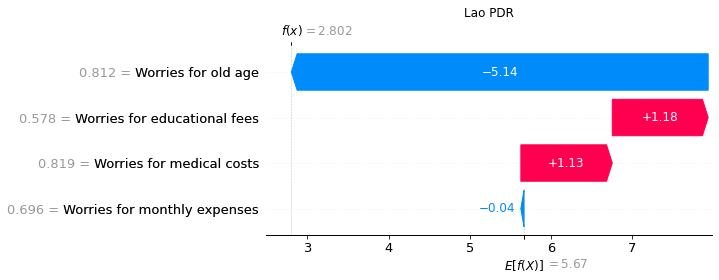

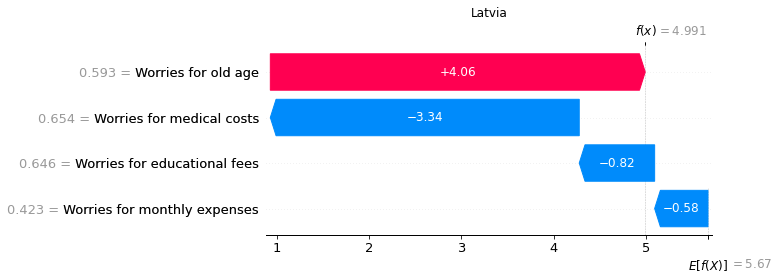

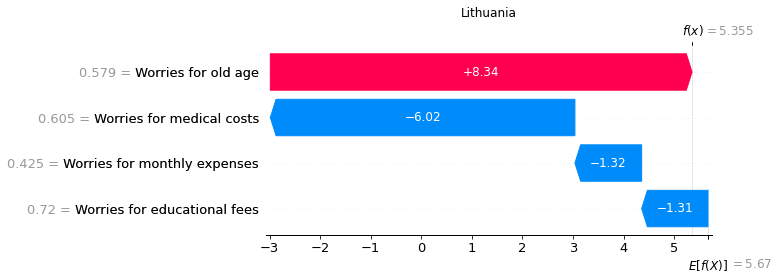

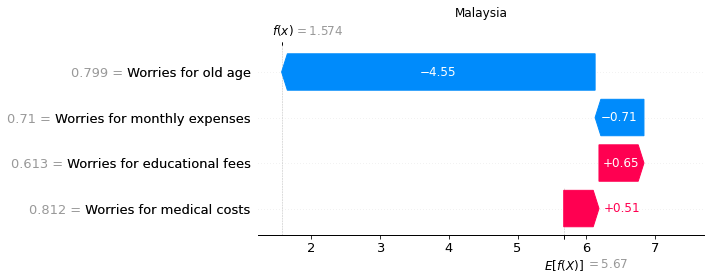

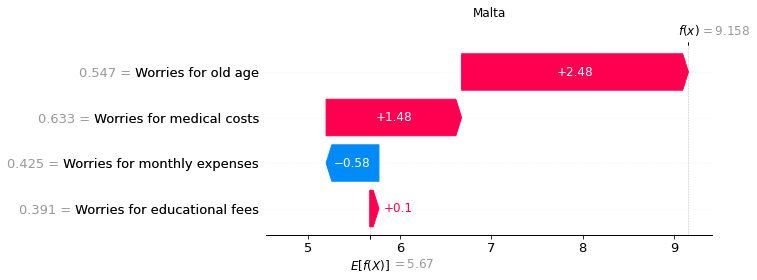

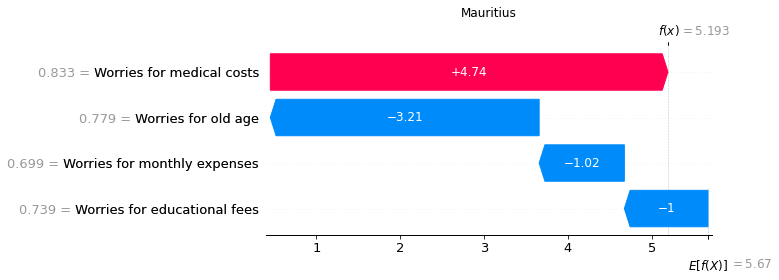

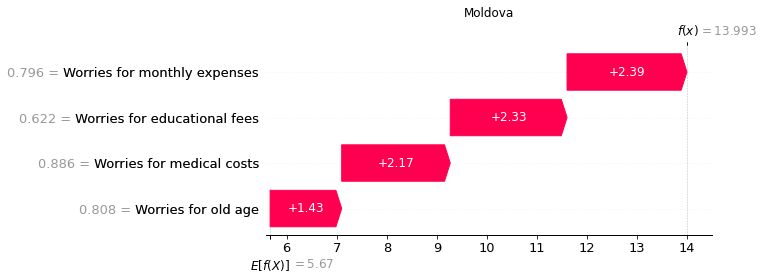

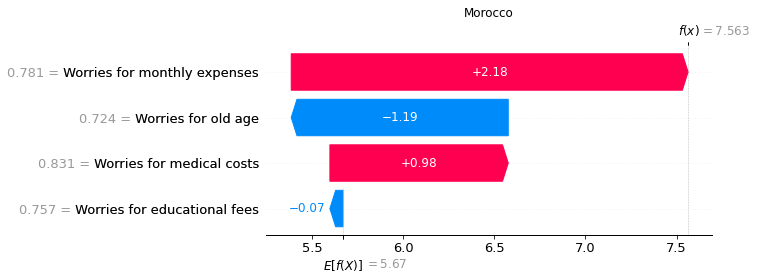

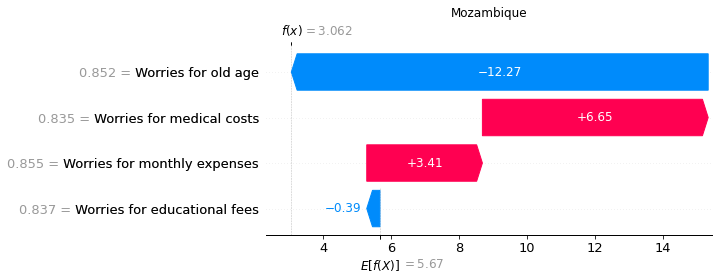

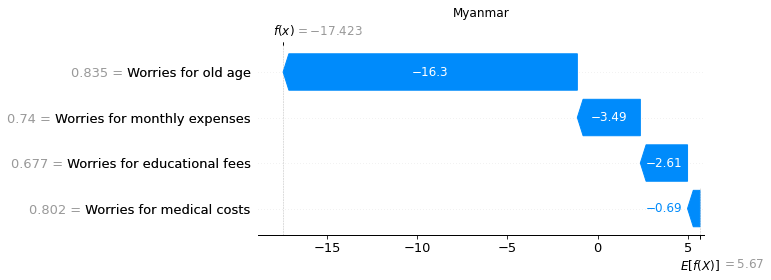

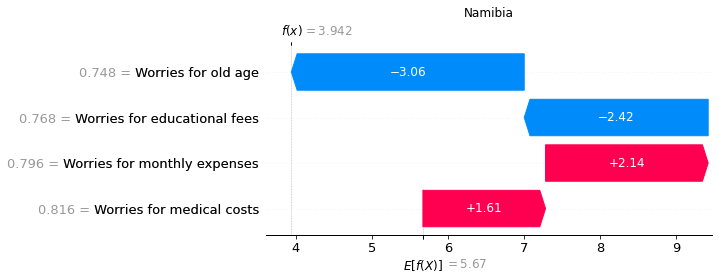

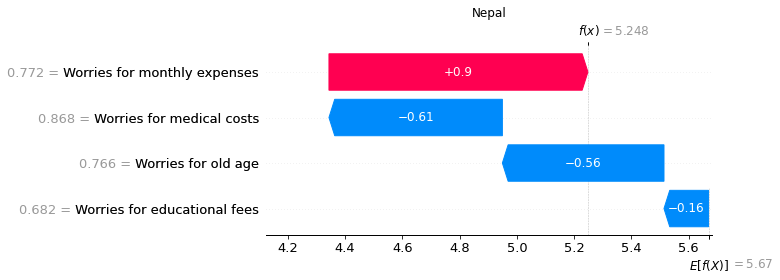

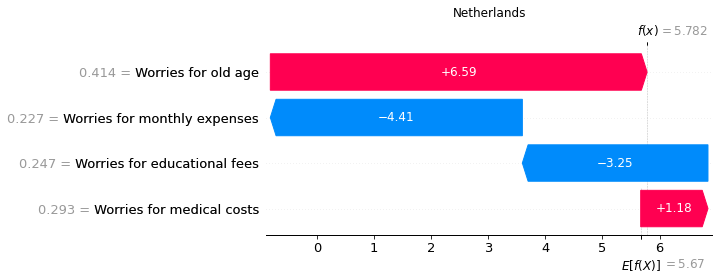

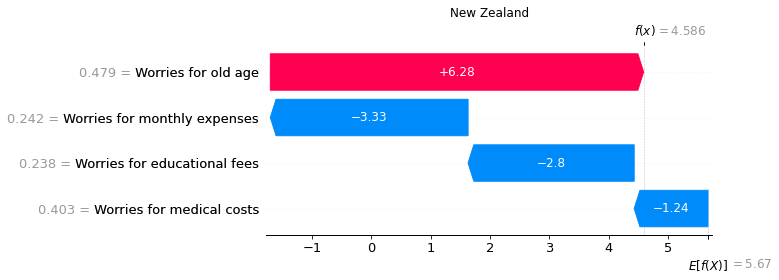

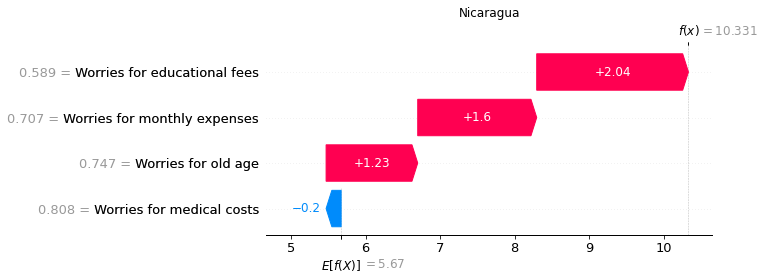

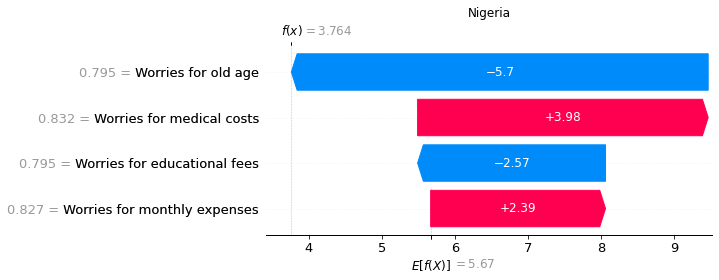

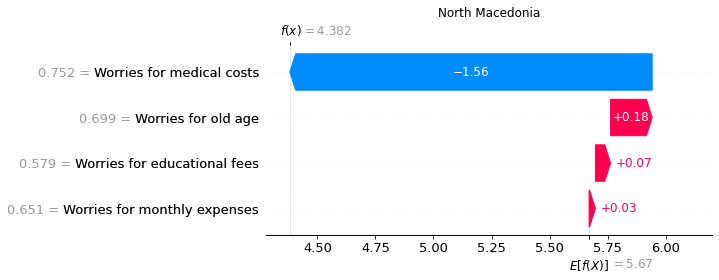

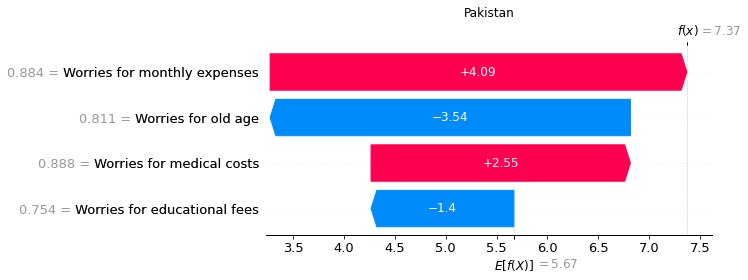

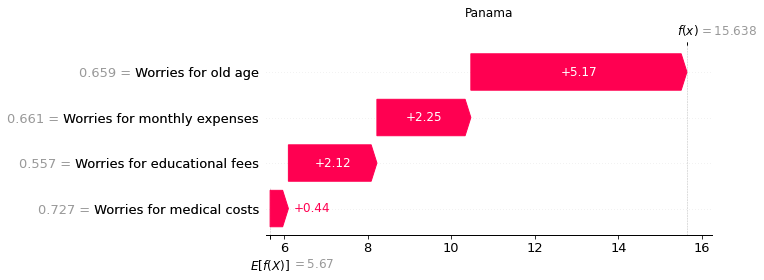

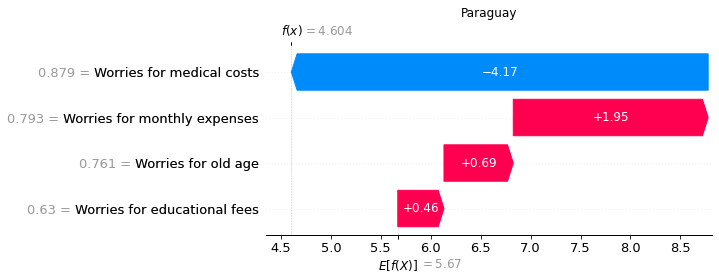

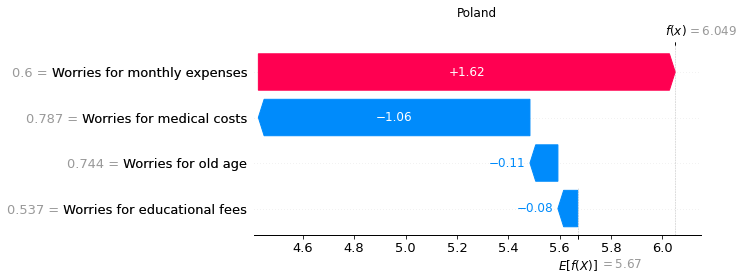

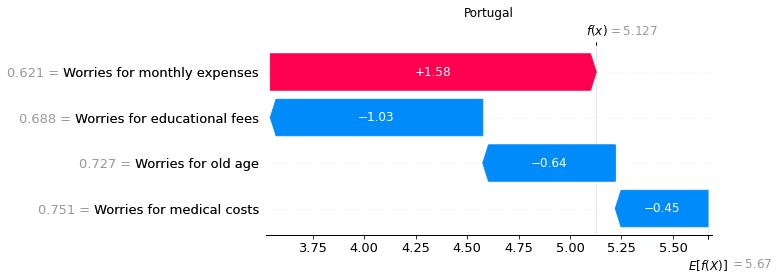

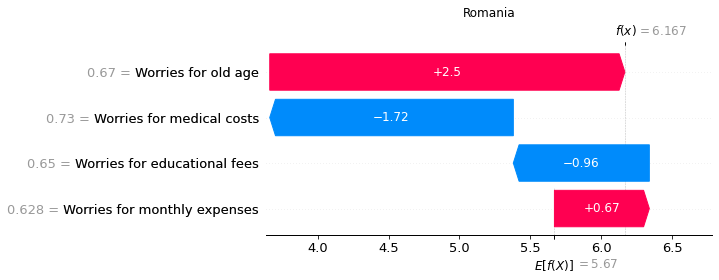

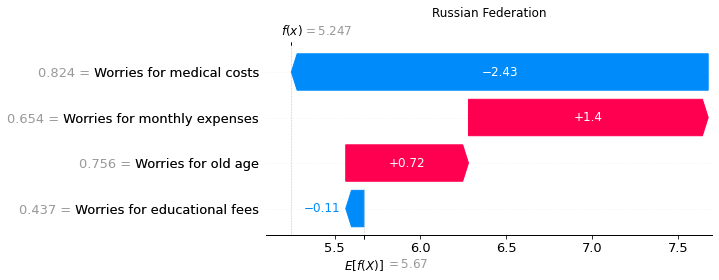

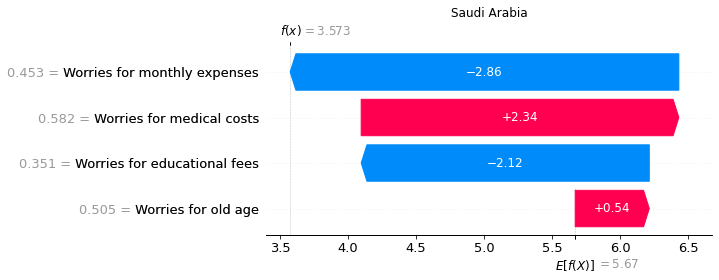

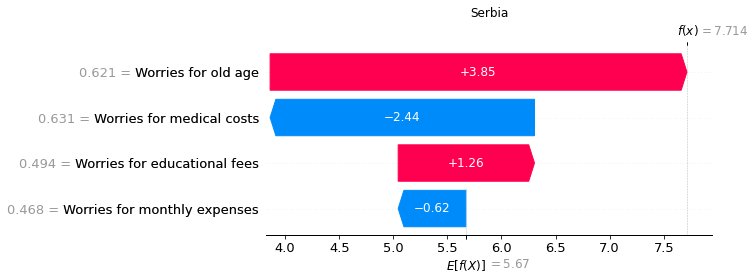

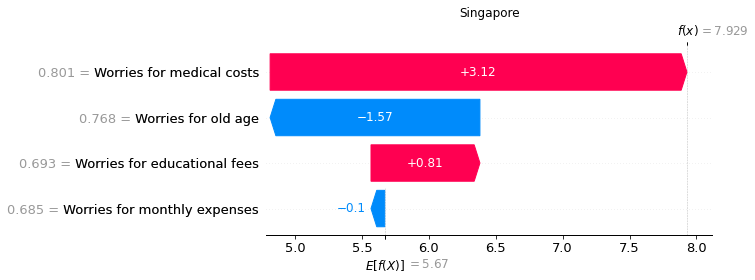

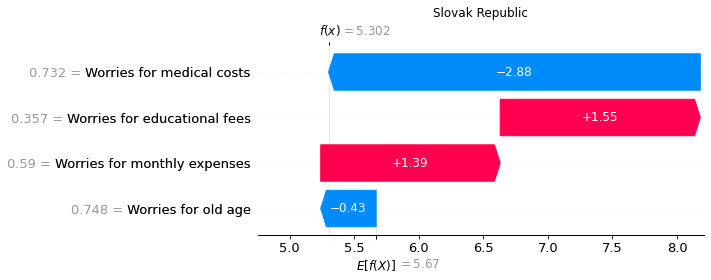

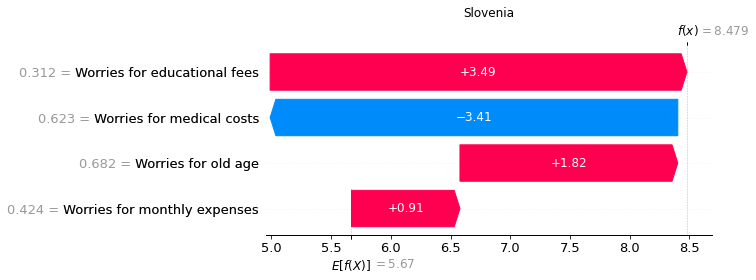

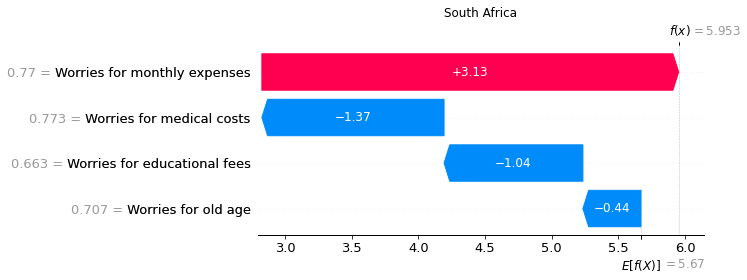

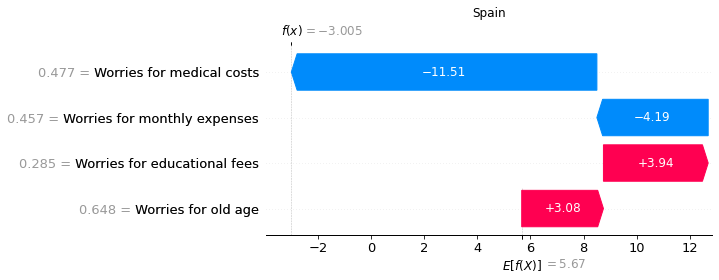

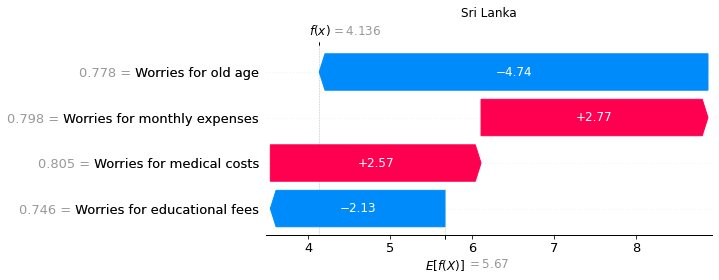

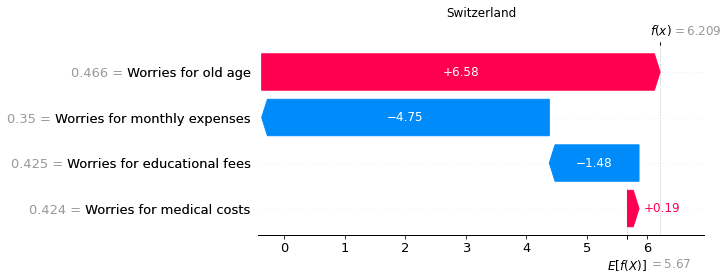

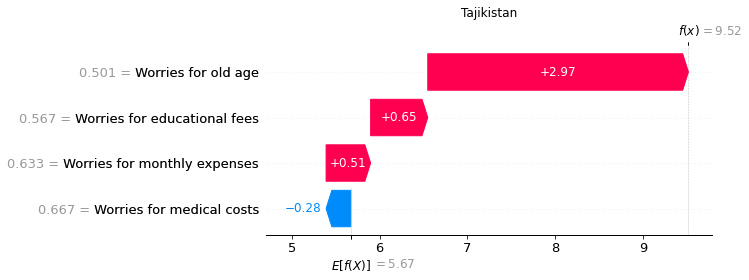

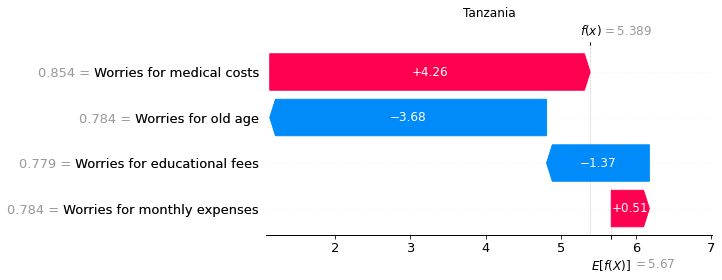

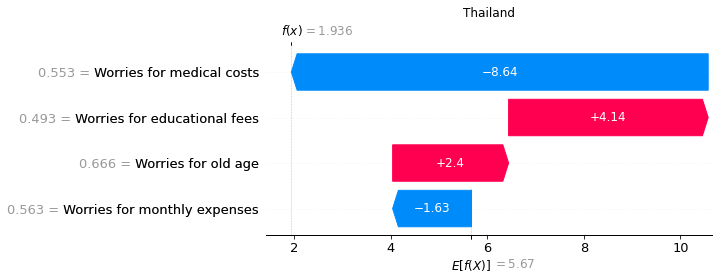

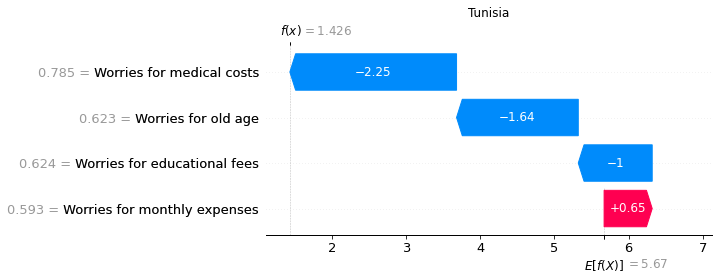

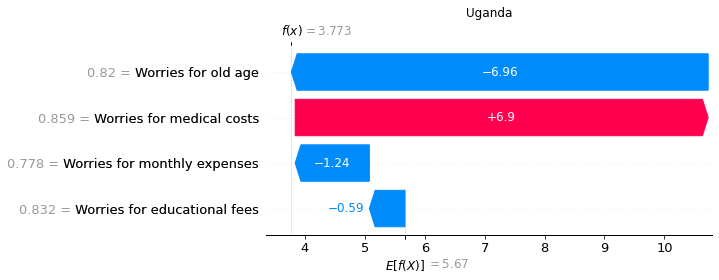

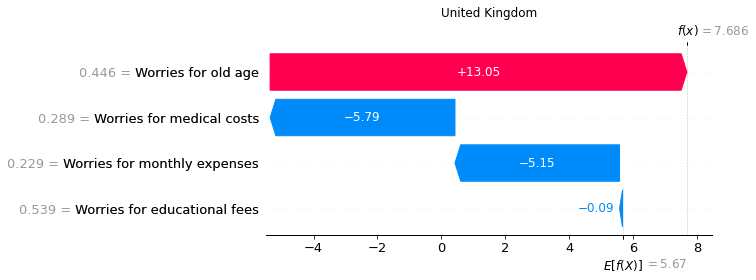

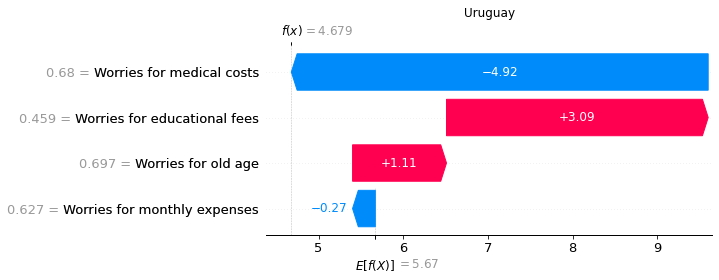

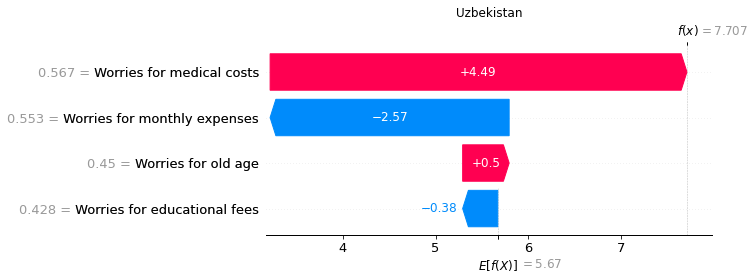

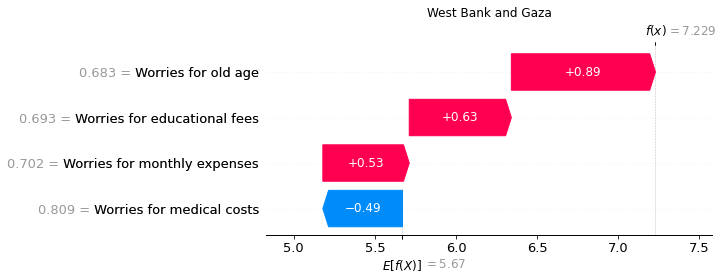

In [75]:
for i in range(len(df_sub2)):
    waterfall(exp[i], show=False, max_display=13)
    plt.title(df_sub2.index[i])
    plt.show()

In [24]:
df_sub2.index[3]

'Australia'

In [25]:
output['gdp_hat'].mean()

5.669974425059872

In [26]:
finance_sub[finance_sub['Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, richest 60% (% age 15+)']>0.348][finance_sub['Worried about not being able to pay for medical costs in case of a serious illness or accident: worried, income, richest 60% (% age 15+)']<0.350]

Boolean Series key will be reindexed to match DataFrame index.


Account (% age 15+)  Financial institution account (% age 15+)  \
Country Name                                                                   
Australia                0.993231                                   0.993231   

              Owns a credit card (% age 15+)  Owns a debit card (% age 15+)  \
Country Name                                                                  
Australia                           0.514058                       0.959426   

              Owns a debit or credit card (% age 15+)  \
Country Name                                            
Australia                                    0.971335   

              Used a mobile phone or the internet to check account balance (% age 15+)  \
Country Name                                                                             
Australia                                              0.878091                          

              Used a mobile phone or the internet to check account balance (% with a financial institution account, age 15+)  \
Country Name                                                                                                                   
Australia                                              0.884075                                                                

              Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)  \
Country Name                                                                                                                                                   
Australia                                              0.830739                                                                                                

              Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% with a financial institution account, age 15+)  \
Country Name                                                                                                                                                                                         
Australia                                                0.8364                                                                                                                                      

              Made a deposit (% with a financial institution account, age 15+)  \
Country Name                                                                     
Australia                                              0.973736                  

              ...  \
Country Name  ...   
Australia     ...   

              Worried about not being able to pay school fees or fees for education: worried, older (% age 15+)  \
Country Name                                                                                                      
Australia                                              0.235277                                                   

              Worried about not being able to pay school fees or fees for education: worried, primary (% age 15+)  \
Country Name                                                                                                        
Australia                                              0.348336                                                     

              Worried about not being able to pay school fees or fees for education: worried, secondary (% age 15+)  \
Country Name                                                                                                          
Australia                                              0.249142                                                       

              Worried about not being able to pay school fees or fees for education: worried, income, richest 60% (% age 15+)  \
Country Name                                                                                                                    
Austra

In [27]:
df

Account (% age 15+)  \
Country Name                              
Algeria                        0.013108   
Argentina                      0.000000   
Armenia                        0.021009   
Australia                      0.000000   
Austria                       -0.041078   
...                                 ...   
Uganda                        -0.072418   
United Kingdom                 0.000000   
Uruguay                       -0.017634   
Uzbekistan                     0.000000   
West Bank and Gaza             0.058044   

                    Financial institution account (% age 15+)  \
Country Name                                                    
Algeria                                              0.006064   
Argentina                                            0.000000   
Armenia                                             -0.021258   
Australia                                           -0.016459   
Austria                                              0.000000   
...                                                       ...   
Uganda                                               0.000000   
United Kingdom                                       0.000000   
Uruguay                                             -0.011020   
Uzbekistan                                           0.000000   
West Bank and Gaza                                   0.000000   

                    Owns a credit card (% age 15+)  \
Country Name                                         
Algeria                                  -0.061317   
Argentina                                 0.036756   
Armenia                                  -0.019243   
Australia                                 0.041289   
Austria                                   0.102687   
...                                            ...   
Uganda                                    0.000000   
United Kingdom                            0.040673   
Uruguay                                   0.058558   
Uzbekistan                               -0.043270   
West Bank and Gaza                       -0.078199   

                    Owns a debit card (% age 15+)  \
Country Name                                        
Algeria                                 -0.062188   
Argentina                                0.000000   
Armenia                                 -0.062527   
Australia                                0.107815   
Austria                                  0.000000   
...                                           ...   
Uganda                                   0.000000   
United Kingdom                           0.042390   
Uruguay                                 -0.008584   
Uzbekistan                              -0.058153   
West Bank and Gaza                      -0.026468   

                    Owns a debit or credit card (% age 15+)  \
Country Name                                                  
Algeria                                           -0.063974   
Argentina                                          0.000000   
Armenia                                           -0.039573   
Australia                                          0.000000   
Austria                                            0.000000   
...                                                     ...   
Uganda                                             0.000000   
United Kingdom                                     0.040616   
Uruguay                                            0.003398   
Uzbekistan                                        -0.038530   
West Bank and Gaza                                 0.000000   

                    Used a mobile phone or the internet to check account balance (% age 15+)  \
Country Name                                                                                   
Algeria                                                     -0.010880                          
Argentina                                                    0.000000                          
Armenia          

In [28]:
finance_sub

Account (% age 15+)  \
Country Name                              
Algeria                        0.440970   
Argentina                      0.716271   
Armenia                        0.553477   
Australia                      0.993231   
Austria                        0.999507   
...                                 ...   
Uganda                         0.659140   
United Kingdom                 0.997633   
Uruguay                        0.741273   
Uzbekistan                     0.441348   
West Bank and Gaza             0.336426   

                    Financial institution account (% age 15+)  \
Country Name                                                    
Algeria                                              0.440970   
Argentina                                            0.663254   
Armenia                                              0.522469   
Australia                                            0.993231   
Austria                                              0.999507   
...                                                       ...   
Uganda                                               0.365608   
United Kingdom                                       0.997633   
Uruguay                                              0.741273   
Uzbekistan                                           0.441348   
West Bank and Gaza                                   0.331804   

                    Owns a credit card (% age 15+)  \
Country Name                                         
Algeria                                   0.027665   
Argentina                                 0.288874   
Armenia                                   0.092168   
Australia                                 0.514058   
Austria                                   0.589850   
...                                            ...   
Uganda                                    0.035117   
United Kingdom                            0.621073   
Uruguay                                   0.365500   
Uzbekistan                                0.037792   
West Bank and Gaza                        0.035794   

                    Owns a debit card (% age 15+)  \
Country Name                                        
Algeria                                  0.228699   
Argentina                                0.548893   
Armenia                                  0.194230   
Australia                                0.959426   
Austria                                  0.955424   
...                                           ...   
Uganda                                   0.179780   
United Kingdom                           0.954559   
Uruguay                                  0.662834   
Uzbekistan                               0.362631   
West Bank and Gaza                       0.213476   

                    Owns a debit or credit card (% age 15+)  \
Country Name                                                  
Algeria                                            0.238245   
Argentina                                          0.564753   
Armenia                                            0.219877   
Australia                                          0.971335   
Austria                                            0.977223   
...                                                     ...   
Uganda                                             0.185550   
United Kingdom                                     0.966845   
Uruguay                                            0.671461   
Uzbekistan                                         0.364723   
West Bank and Gaza                                 0.216683   

                    Used a mobile phone or the internet to check account balance (% age 15+)  \
Country Name                                                                                   
Algeria                                                      0.113266                          
Argentina                                                    0.310560                          
Armenia          

In [29]:
df_sub2

Worries for monthly expenses - Highest income  \
Country Name                                                        
Algeria                                                  0.000000   
Argentina                                                0.000000   
Armenia                                                 -0.006048   
Australia                                                0.000000   
Austria                                                  0.031346   
...                                                           ...   
Uganda                                                   0.000000   
United Kingdom                                           0.000000   
Uruguay                                                 -0.012777   
Uzbekistan                                               0.000000   
West Bank and Gaza                                       0.000000   

                    Worries for monthly expenses - Lowest income  \
Country Name                                                       
Algeria                                                -0.031187   
Argentina                                               0.000000   
Armenia                                                -0.040395   
Australia                                               0.160398   
Austria                                                 0.156053   
...                                                          ...   
Uganda                                                  0.000000   
United Kingdom                                          0.250173   
Uruguay                                                -0.063121   
Uzbekistan                                              0.000000   
West Bank and Gaza                                     -0.123198   

                    Worries for monthly expenses - All  \
Country Name                                             
Algeria                                      -0.016095   
Argentina                                     0.000000   
Armenia                                      -0.039379   
Australia                                     0.033409   
Austria                                       0.038652   
...                                                ...   
Uganda                                       -0.049994   
United Kingdom                                0.038480   
Uruguay                                      -0.007360   
Uzbekistan                                    0.009744   
West Bank and Gaza                            0.000000   

                    Worries for medical costs - Highest income  \
Country Name                                                     
Algeria                                               0.005621   
Argentina                                             0.000000   
Armenia                                              -0.012854   
Australia                                            -0.169436   
Austria                                              -0.094960   
...                                                        ...   
Uganda                                                0.160445   
United Kingdom                                       -0.162354   
Uruguay                                              -0.040662   
Uzbekistan                                           -0.069054   
West Bank and Gaza                                    0.000000   

                    Worries for medical costs - Lowest income  \
Country Name                                                    
Algeria                                              0.000000   
Argentina                                           -0.035967   
Armenia                                             -0.029830   
Australia                                            0.000000   
Austria                                              0.045352   
...                                                       ...   
Uganda                                               0.021339   
United Kingdom                        

In [30]:
gdp = pd.read_excel('gdp(2021).xlsx', sheet_name='gdp(2021)')
gdp

Country Name Country Code         Indicator Name  \
0                          Aruba          ABW  GDP growth (annual %)   
1    Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                    Afghanistan          AFG  GDP growth (annual %)   
3     Africa Western and Central          AFW  GDP growth (annual %)   
4                         Angola          AGO  GDP growth (annual %)   
..                           ...          ...                    ...   
261                       Kosovo          XKX  GDP growth (annual %)   
262                  Yemen, Rep.          YEM  GDP growth (annual %)   
263                 South Africa          ZAF  GDP growth (annual %)   
264                       Zambia          ZMB  GDP growth (annual %)   
265                     Zimbabwe          ZWE  GDP growth (annual %)   

        Indicator Code  1960      1961      1962      1963       1964  \
0    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
1    NY.GDP.MKTP.KD.ZG   NaN  0.239594  7.980768  5.164334   4.579952   
2    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
3    NY.GDP.MKTP.KD.ZG   NaN  1.848752  3.770220  7.272440   5.396349   
4    NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
..                 ...   ...       ...       ...       ...        ...   
261  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
262  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN        NaN   
263  NY.GDP.MKTP.KD.ZG   NaN  3.844734  6.177931  7.373709   7.939609   
264  NY.GDP.MKTP.KD.ZG   NaN  1.361382 -2.490839  3.272393  12.214048   
265  NY.GDP.MKTP.KD.ZG   NaN  6.316157  1.434471  6.244345  -1.106172   

          1965  ...       2012      2013      2014       2015      2016  \
0          NaN  ...  -1.035375  6.429817 -0.020479   3.543630  2.116716   
1     5.327717  ...   0.923067  4.200209  3.984387   2.952845  2.217017   
2          NaN  ...  12.752287  5.600745  2.724543   1.451315  2.260314   
3     4.049793  ...   5.142997  6.104192  5.927355   2.745894  0.127844   
4          NaN  ...   8.540000  4.950000  4.820000   0.940000 -2.580000   
..         ...  ...        ...       ...       ...        ...       ...   
261        NaN  ...   1.712195  5.340908  3.348804   5.916270  5.571757   
262        NaN  ...   2.392886  4.823415 -0.188574 -27.994546 -9.375124   
263   6.122798  ...   2.396232  2.485468  1.413826   1.321862  0.664552   
264  16.647456  ...   7.597593  5.057232  4.697992   2.920375  3.776679   
265   4.910571  ...  16.665429  1.989493  2.376929   1.779873  0.755869   

         2017      2018      2019       2020      2021  
0    5.482371  1.267218 -2.085600 -22.318948       NaN  
1    2.557135  2.485244  2.025941  -2.886856  4.303667  
2    2.647003  1.189228  3.911603  -2.351101       NaN  
3    2.317679  2.952190  3.202544  -0.897014  3.914799  
4   -0.150000 -1.316312 -0.700000  -5.500000  0.700000  
..        ...       ...       ...        ...       ...  
261  4.825690  3.406631  4.756831  -5.340275  9.127578  
262 -5.071796  0.752448  1.400000  -8.500000 -2.061513  
263  1.157947  1.487617  0.113054  -6.431975  4.914603  
264  3.504336  4.034494  1.441306  -2.785055  3.572815  
265  4.709492  4.824211 -6.144236  -6.248748  5.849420  

[266 rows x 66 columns]

In [33]:
gdp[gdp['Country Name'].isin(['United Kingdom', 'Netherlands', 'Ireland'])][['Country Name', '2021']]

Country Name       2021
81   United Kingdom   7.441273
111         Ireland  13.478658
176     Netherlands   5.035902

In [35]:
gdp[gdp['Country Name'].isin(finance_sub.index)]['2021'].describe()

count    93.000000
mean      5.537708
std       3.990423
min     -17.984742
25%       3.647187
50%       4.914603
75%       7.420110
max      15.335819
Name: 2021, dtype: float64

In [83]:
finance_sub[finance_sub.index.isin(['United Kingdom', 'Netherlands', 'Spain', 'Finland'])][['Worried about not having enough money for monthly expenses or bills: worried (% age 15+)',]]

Worried about not having enough money for monthly expenses or bills: worried (% age 15+)
Country Name                                                                                            
Finland                                                  0.304256                                       
Netherlands                                              0.226624                                       
Spain                                                    0.456886                                       
United Kingdom                                           0.228602

In [90]:
finance_sub

Worried about not having enough money for old age: worried (% age 15+)  \
Country Name                                                                                 
Algeria                                                      0.619312                        
Argentina                                                    0.724327                        
Armenia                                                      0.604209                        
Australia                                                    0.537404                        
Austria                                                      0.545936                        
...                                                               ...                        
Uganda                                                       0.819617                        
United Kingdom                                               0.445709                        
Uruguay                                                      0.697367                        
Uzbekistan                                                   0.450190                        
West Bank and Gaza                                           0.683449                        

                    Worried about not being able to pay for medical costs in case of a serious illness or accident: worried (% age 15+)  \
Country Name                                                                                                                              
Algeria                                                      0.802301                                                                     
Argentina                                                    0.738494                                                                     
Armenia                                                      0.759388                                                                     
Australia                                                    0.424180                                                                     
Austria                                                      0.492666                                                                     
...                                                               ...                                                                     
Uganda                                                       0.859318                                                                     
United Kingdom                                               0.288780                                                                     
Uruguay                                                      0.679845                                                                     
Uzbekistan                                                   0.566861                                                                     
West Bank and Gaza                                           0.809345                                                                     

                    Worried about not having enough money for monthly expenses or bills: worried (% age 15+)  \
Country Name                                                                                                   
Algeria                                                      0.671356                                          
Argentina                                                    0.746074                                          
Armenia                                                      0.659703                                          
Australia                                                    0.298301                                          
Austria                                                      0.329698                                          
...                                                               ...                                          
Uganda                                                       0.777816                        

In [88]:
df_sub.to_csv('shap1004.csv')